### Import Data -> Geographic Data  

Data has more enteries than survey responses. Program enteries and site enteries are merged.  
This is an old note : don't do this necessarily: 
These can be filtered by "program == Null" or "program_name == Null"  or "geometry == Null" or all of these

These enteries relate to points through globalid. -> parentglobalid


In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

### adding new survey data entries: summer data collection, first data to integrate into main dataset
- data was edited between 7/9/23 and 7/28/23
- use the "edited_date" field to distinguish new entries from old after merging

In [215]:
pd.set_option('display.max_columns', None)
surv_new = pd.read_csv('/Users/saraeichner/Dropbox/hudson_access_project/hap_data/survey_exports/july28/07_28_2023_hap_survey_csv/Hudson_Access_Project_Data_Survey_0.csv')

In [1]:
surv_new.head()

NameError: name 'surv_new' is not defined

### current hap_site_point data is coming from the survey links + dataset that is scored for data collection prioritization
- this was reorganized to match the survey in June
- data was cleaned in june
- last updated on june 23

compare existing data fields to survey data fields
- Updating this on 8-1-23 to integrate summer data colleciton survey export
- notes about recent data changes: 
    - before integrating new data, update the ex_data with act_codes from hap_site_points.geojson, last updated on 6-22
    - this was removed from teh survey link site points, add it back

In [6]:
pd.set_option('display.max_columns',None)
ex_data_links = gpd.read_file('/Users/saraeichner/Dropbox/hudson_access_project/hap_data/survey_data_prep/survey_links/site_points_survey_links_scores_06232023.geojson')
ex_data_links.head()

,x,y,site_id,site_name,access_id,site_address,county,owner,owner_type,site_manager,phone_site_manager,email_public,email_site_manager,phone_public,url_public,program_id,site_description,site_name_photo_01,photo_credits,safety,informal_swimming,use_limits,fee,fee_amount,open_close_date,hours_info,hiking,boat_launch_YN,equipment_rental,parking,parking_description,restrooms,drinking_water,changing_station,food,picnic_area,playground,pets_allowed,amenities_description,wheelchair_access_amenities,wheelchair_access_restrooms,wheelchair_access_trails,accessibility_description,public_transit,bike_path_accessible,bike_path_access_description,difficulty_level_HPBL,safety_HPBL,boat_launch_type_HPBL,boat_storage_HPBL,difficulty_level_MPBL,safety_MPBL,boat_launch_type_MPBL,boat_storage_MPBL,boat_storage_overnight_MPBL,navigational_notes_MPBL,pump_out_MPBL,haul_out_MPBL,boat_cleaning_requirements_MPBL,boat_inspections_MPBL,access_type_FISH,access_type_other_FISH,permit_FISH,fish_species_FISH,walking_path_FISH,safety_SWIM,shoreline_type_SWIM,shoreline_type_other_SWIM,showers_SWIM,lifeguard_SWIM,municipality,natural_no,site_label,source,sq_acres,state,status,typology,waterbody,program_YN,program_name,program_contact,program_phone,program_url,program_hours,program_description,lon,lat,public_transit_description,CreationDate,Creator,EditDate,Editor,FISH_YN,GlobalID,ObjectID,HPBL_YN,MPBL_YN,SWIM_YN,access_type,access_type_other,bike_parking_rack,bike_pumps,boat_access,boat_storage_location_HPBL,boat_storage_location_MPBL,distance_parking_to_launch_HPBL,distance_parking_to_launch_MPBL,site_name_photo_02,site_name_photo_03,trailer_parking_HPBL,trailer_parking_MPBL,walking_trails,water_depth_est,survey_link,site_score,geometry
0,-73.768664,40.599294,174,Bayswater Park,"4, 516, 151, 787","Dwight Ave, Seagirt Blvd between Beach 38th St...",Queens,NYC Parks,NYC Parks,NYC Parks,None,None,None,None,"www.nycgovparks.org/parks/bayswater-park, www....",None,"This waterfront park is named, in part, for Ju...",None,None,"Launch perpendicular, as large, jagged rocks p...",None,None,None,None,None,Sunrise to Sunset (April 1 to December 1),None,Y,None,None,None,Y,Y,None,None,Y,Y,Y,None,None,None,None,None,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Queens,New York City",None,None,"nyc water trail,nyc wap fish","40.16,NA","NY,",None,"Beach,","Jamaica Bay,",Y,Kids in Motion,None,None,None,None,None,-73.768664,40.599294,Subway: A to Beach 36th st; Q22 bus to Beach C...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,https://survey123.arcgis.com/share/eb32f62d536...,3.0,POINT (-73.76866 40.59929)
1,-74.240515,40.501400,29,Conference House Park,"126, 83, 1613, 1803","Hylan Blvd & Satterlee St, Staten Island, Hyla...",Richmond,NYC Parks,None,None,None,None,None,None,www.dec.ny.gov/outdoor/8377.html,None,The site of a legendary display of American de...,None,None,Many semi-submerged pilings north and south of...,None,"Rules prohibit swimming, diving, or bathing, r...",Y,None,None,Sunrise to Sunset (April 1 to December 1),Y,Y,None,Y,None,Y,Y,None,None,None,Y,None,None,None,None,None,None,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Staten Island,,New York City",None,None,"nyc water trail,nyc wap fish",None,"NY,","c,","Beach,","Arthur Kill + Kill Van Kull,",Y,Kayak Staten Island,None,None,None,None,None,-74.240515,40.501400,"S59, S78, X17, X22, X22A bus to Hylan Blvd, Cr...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Y,None,https://survey123.arcgis.com/share/eb32f62d536...,1.0,POINT (-74.24052 40.50140)
2,-74.217842,40.506834,183,Mt Loretto Natural Area,"1, 443, 511, 800","End of Sharrotts Ave at Hylan Blvd, Hylan Blvd...",Richmond,NYSDEC,None,None,No

#### create a dataframe from the geodataframe to review in the tabular viewer


In [11]:
## this is the data with scores and survey links from 6-23-23, drop geometry so the tabular viewer can handle the df
ex_data_links_review = pd.DataFrame(ex_data_links.drop(columns='geometry'))
# find the size and dimensions of the ex_data_links_review dataframe
ex_data_links_review.shape # (752, 117)

In [66]:
act = gpd.read_file('/Users/saraeichner/Dropbox/hudson_access_project/hap_data/merged_site_data/current/hap_site_points.geojson')
act.head()

,X,Y,site_id,site_name,access_id,act_codes,access_name,address,county,owner,owner_type,site_manager,phone_site_manager,email_manual,email_site_manager,email_public,phone_public,url_public,program_id,site_description,photo,photo_credits,safety,informal_swimming,use_limits,fee,fee_amount,open_close_date,hours_info,hiking,boat_launch_YN,equipment_rental,parking,parking_description,restrooms,drinking_water,changing_station,food,picnic_area,playground,pets_allowed,amenities_description,wheelchair_access_amenities,wheelchair_access_water,wheelchair_access_restrooms,wheelchair_access_trails,accessibility_description,public_transit,bike_path_accessible,bike_path_accessible_description,difficulty_level_HPBL,safety_HPBL,boat_launch_HPBL,boat_storage_HPBL,difficulty_level_MPBL,safety_MPBL,boat_launch_MPBL,boat_storage_MPBL,boat_storage_overnight_MPBL,navigational_notes_MPBL,pump_out_MPBL,haul_out_MPBL,boat_cleaning_requirements_MPBL,boat_inspections_MPBL,access_type_FISH,access_type_other_FISH,permit_FISH,fish_species_FISH,water_type_FISH,walking_path_FISH,limitations_FISH,hazards_SWIM,shoreline_type_SWIM,shoreline_type_other_SWIM,showers_SWIM,lifeguard_SWIM,municipality,natural_no,site_label,source,sq_acres,state,status,typology,waterbody,program,program_name,program_email,program_phone,program_url,program_hours,program_description,long,lat,public_transit_description,geometry
0,-73.768664,40.599294,174,Bayswater Park,"4, 516, 151, 787","FISH, HPBL, MPBL",None,"Dwight Ave, Seagirt Blvd between Beach 38th St...",Queens,NYC Parks,NYC Parks,NYC Parks,None,None,None,None,None,"www.nycgovparks.org/parks/bayswater-park, www....",None,"This waterfront park is named, in part, for Ju...","Bayswater Park Blue Trail, hiking trail connec...",None,"Launch perpendicular, as large, jagged rocks p...",None,None,None,None,None,Sunrise to Sunset (April 1 to December 1),None,Y,None,None,None,Y,Y,None,None,Y,Y,Y,None,None,None,None,None,None,Y,None,None,None,None,Launch & Landing,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Queens,New York City",None,None,"nyc water trail,nyc wap fish","40.16,NA","NY,",None,"Beach,","Jamaica Bay,",Y,Kids in Motion,None,None,None,None,None,-73.768664,40.599294,Subway: A to Beach 36th st; Q22 bus to Beach C...,POINT (-73.76866 40.59929)
1,-74.240515,40.501400,29,Conference House Park,"126, 83, 1613, 1803","MPBL, HPBL, FISH",Butler Manor Woods Unique Area,"Hylan Blvd & Satterlee St, Staten Island, Hyla...",Richmond,NYC Parks,None,None,None,None,None,None,None,www.dec.ny.gov/outdoor/8377.html,None,The site of a legendary display of American de...,None,None,Many semi-submerged pilings north and south of...,None,"Rules prohibit swimming, diving, or bathing, r...",Y,None,None,Sunrise to Sunset (April 1 to December 1),Y,Y,None,Y,None,Y,Y,None,None,None,Y,None,None,None,None,None,None,None,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Staten Island,,New York City",None,None,"nyc water trail,nyc wap fish",None,"NY,","c,","Beach,","Arthur Kill + Kill Van Kull,",Y,Kayak Staten Island,None,None,None,None,None,-74.240515,40.501400,"S59, S78, X17, X22, X22A bus to Hylan Blvd, Cr...",POINT (-74.24052 40.50140)
2,-74.217842,40.506834,183,Mt Loretto Natural Area,"1, 443, 511, 800",FISH,Dorothy Fitzpatrick Fishing Pier,"End of Sharrotts Ave at Hylan Blvd, Hylan Blvd...",Richmond,NYSDEC,None,None,None,None,None,None,None,www.dec.ny.gov/outdoor/8377.html,None,None,None,None,None,None,None,None,None,None,None,Y,Y,None,None,None,Y,None,None,None,None,None,None,None,None,None,None,Y,None,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,New York City,None,None,nyc wap fish,None,None,None,"Pier,Beach,",None,None,None,None,None,None,None,None,-74.217842,40.506834,"S59, S78 bus to Hylan Blvd, Sh

### Before comparing column names make a few data edits
these were moved down below the script for integrating new data + activity code join
- scroll down to HUDSON RIVER PARK data edits

### Activity Code Join to site point data that was updated to match survey (ex_data)

In [67]:
ex_data_links.head()

,x,y,site_id,site_name,access_id,site_address,county,owner,owner_type,site_manager,phone_site_manager,email_public,email_site_manager,phone_public,url_public,program_id,site_description,site_name_photo_01,photo_credits,safety,informal_swimming,use_limits,fee,fee_amount,open_close_date,hours_info,hiking,boat_launch_YN,equipment_rental,parking,parking_description,restrooms,drinking_water,changing_station,food,picnic_area,playground,pets_allowed,amenities_description,wheelchair_access_amenities,wheelchair_access_restrooms,wheelchair_access_trails,accessibility_description,public_transit,bike_path_accessible,bike_path_access_description,difficulty_level_HPBL,safety_HPBL,boat_launch_type_HPBL,boat_storage_HPBL,difficulty_level_MPBL,safety_MPBL,boat_launch_type_MPBL,boat_storage_MPBL,boat_storage_overnight_MPBL,navigational_notes_MPBL,pump_out_MPBL,haul_out_MPBL,boat_cleaning_requirements_MPBL,boat_inspections_MPBL,access_type_FISH,access_type_other_FISH,permit_FISH,fish_species_FISH,walking_path_FISH,safety_SWIM,shoreline_type_SWIM,shoreline_type_other_SWIM,showers_SWIM,lifeguard_SWIM,municipality,natural_no,site_label,source,sq_acres,state,status,typology,waterbody,program_YN,program_name,program_contact,program_phone,program_url,program_hours,program_description,lon,lat,public_transit_description,CreationDate,Creator,EditDate,Editor,FISH_YN,GlobalID,ObjectID,HPBL_YN,MPBL_YN,SWIM_YN,access_type,access_type_other,bike_parking_rack,bike_pumps,boat_access,boat_storage_location_HPBL,boat_storage_location_MPBL,distance_parking_to_launch_HPBL,distance_parking_to_launch_MPBL,site_name_photo_02,site_name_photo_03,trailer_parking_HPBL,trailer_parking_MPBL,walking_trails,water_depth_est,survey_link,site_score,geometry
0,-73.768664,40.599294,174,Bayswater Park,"4, 516, 151, 787","Dwight Ave, Seagirt Blvd between Beach 38th St...",Queens,NYC Parks,NYC Parks,NYC Parks,None,None,None,None,"www.nycgovparks.org/parks/bayswater-park, www....",None,"This waterfront park is named, in part, for Ju...",None,None,"Launch perpendicular, as large, jagged rocks p...",None,None,None,None,None,Sunrise to Sunset (April 1 to December 1),None,Y,None,None,None,Y,Y,None,None,Y,Y,Y,None,None,None,None,None,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Queens,New York City",None,None,"nyc water trail,nyc wap fish","40.16,NA","NY,",None,"Beach,","Jamaica Bay,",Y,Kids in Motion,Kids in Motion,None,None,None,None,-73.768664,40.599294,Subway: A to Beach 36th st; Q22 bus to Beach C...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,https://survey123.arcgis.com/share/eb32f62d536...,3.0,POINT (-73.76866 40.59929)
1,-74.240515,40.501400,29,Conference House Park,"126, 83, 1613, 1803","Hylan Blvd & Satterlee St, Staten Island, Hyla...",Richmond,NYC Parks,None,None,None,None,None,None,www.dec.ny.gov/outdoor/8377.html,None,The site of a legendary display of American de...,None,None,Many semi-submerged pilings north and south of...,None,"Rules prohibit swimming, diving, or bathing, r...",Y,None,None,Sunrise to Sunset (April 1 to December 1),Y,Y,None,Y,None,Y,Y,None,None,None,Y,None,None,None,None,None,None,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Staten Island,,New York City",None,None,"nyc water trail,nyc wap fish",None,"NY,","c,","Beach,","Arthur Kill + Kill Van Kull,",Y,Kayak Staten Island,Kayak Staten Island,None,None,None,None,-74.240515,40.501400,"S59, S78, X17, X22, X22A bus to Hylan Blvd, Cr...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Y,None,https://survey123.arcgis.com/share/eb32f62d536...,1.0,POINT (-74.24052 40.50140)
2,-74.217842,40.506834,183,Mt Loretto Natural Area,"1, 443, 511, 800","End of Sharrotts Ave at Hylan Blvd, Hylan Blvd...",Ric

In [69]:
# subset act to only include the columns we need
act_subset = act[['site_id', 'act_codes']]

In [71]:
# join 'act_codes' from act_subset to ex_data_links on 'site_id' without duplicating columns or adding a suffix to a column name
sites = pd.merge(ex_data_links, act_subset[["site_id","act_codes"]], on="site_id", how="left")
sites.head()

,x,y,site_id,site_name,access_id,site_address,county,owner,owner_type,site_manager,phone_site_manager,email_public,email_site_manager,phone_public,url_public,program_id,site_description,site_name_photo_01,photo_credits,safety,informal_swimming,use_limits,fee,fee_amount,open_close_date,hours_info,hiking,boat_launch_YN,equipment_rental,parking,parking_description,restrooms,drinking_water,changing_station,food,picnic_area,playground,pets_allowed,amenities_description,wheelchair_access_amenities,wheelchair_access_restrooms,wheelchair_access_trails,accessibility_description,public_transit,bike_path_accessible,bike_path_access_description,difficulty_level_HPBL,safety_HPBL,boat_launch_type_HPBL,boat_storage_HPBL,difficulty_level_MPBL,safety_MPBL,boat_launch_type_MPBL,boat_storage_MPBL,boat_storage_overnight_MPBL,navigational_notes_MPBL,pump_out_MPBL,haul_out_MPBL,boat_cleaning_requirements_MPBL,boat_inspections_MPBL,access_type_FISH,access_type_other_FISH,permit_FISH,fish_species_FISH,walking_path_FISH,safety_SWIM,shoreline_type_SWIM,shoreline_type_other_SWIM,showers_SWIM,lifeguard_SWIM,municipality,natural_no,site_label,source,sq_acres,state,status,typology,waterbody,program_YN,program_name,program_contact,program_phone,program_url,program_hours,program_description,lon,lat,public_transit_description,CreationDate,Creator,EditDate,Editor,FISH_YN,GlobalID,ObjectID,HPBL_YN,MPBL_YN,SWIM_YN,access_type,access_type_other,bike_parking_rack,bike_pumps,boat_access,boat_storage_location_HPBL,boat_storage_location_MPBL,distance_parking_to_launch_HPBL,distance_parking_to_launch_MPBL,site_name_photo_02,site_name_photo_03,trailer_parking_HPBL,trailer_parking_MPBL,walking_trails,water_depth_est,survey_link,site_score,geometry,act_codes
0,-73.768664,40.599294,174,Bayswater Park,"4, 516, 151, 787","Dwight Ave, Seagirt Blvd between Beach 38th St...",Queens,NYC Parks,NYC Parks,NYC Parks,None,None,None,None,"www.nycgovparks.org/parks/bayswater-park, www....",None,"This waterfront park is named, in part, for Ju...",None,None,"Launch perpendicular, as large, jagged rocks p...",None,None,None,None,None,Sunrise to Sunset (April 1 to December 1),None,Y,None,None,None,Y,Y,None,None,Y,Y,Y,None,None,None,None,None,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Queens,New York City",None,None,"nyc water trail,nyc wap fish","40.16,NA","NY,",None,"Beach,","Jamaica Bay,",Y,Kids in Motion,Kids in Motion,None,None,None,None,-73.768664,40.599294,Subway: A to Beach 36th st; Q22 bus to Beach C...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,https://survey123.arcgis.com/share/eb32f62d536...,3.0,POINT (-73.76866 40.59929),"FISH, HPBL, MPBL"
1,-74.240515,40.501400,29,Conference House Park,"126, 83, 1613, 1803","Hylan Blvd & Satterlee St, Staten Island, Hyla...",Richmond,NYC Parks,None,None,None,None,None,None,www.dec.ny.gov/outdoor/8377.html,None,The site of a legendary display of American de...,None,None,Many semi-submerged pilings north and south of...,None,"Rules prohibit swimming, diving, or bathing, r...",Y,None,None,Sunrise to Sunset (April 1 to December 1),Y,Y,None,Y,None,Y,Y,None,None,None,Y,None,None,None,None,None,None,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Staten Island,,New York City",None,None,"nyc water trail,nyc wap fish",None,"NY,","c,","Beach,","Arthur Kill + Kill Van Kull,",Y,Kayak Staten Island,Kayak Staten Island,None,None,None,None,-74.240515,40.501400,"S59, S78, X17, X22, X22A bus to Hylan Blvd, Cr...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Y,None,https://survey123.arcgis.com/share/eb32f62d536...,1.0,POINT (-74.24052 40.50140),"MPBL, HPBL, FISH"
2,-74.217842,40.506834,183,Mt Loretto Natural Area,"1, 443, 511, 800","End of

#### change dataframe name: sites >> ex_data

In [72]:
# use existing data to set up script (survey columns = sc): 
# ex_data = gpd.read_file('/Users/saraeichner/Dropbox/hudson_access_project/hap_data/merged_site_data/current/hap_site_points.geojson')
ex_data = sites
ex_data.head()

,x,y,site_id,site_name,access_id,site_address,county,owner,owner_type,site_manager,phone_site_manager,email_public,email_site_manager,phone_public,url_public,program_id,site_description,site_name_photo_01,photo_credits,safety,informal_swimming,use_limits,fee,fee_amount,open_close_date,hours_info,hiking,boat_launch_YN,equipment_rental,parking,parking_description,restrooms,drinking_water,changing_station,food,picnic_area,playground,pets_allowed,amenities_description,wheelchair_access_amenities,wheelchair_access_restrooms,wheelchair_access_trails,accessibility_description,public_transit,bike_path_accessible,bike_path_access_description,difficulty_level_HPBL,safety_HPBL,boat_launch_type_HPBL,boat_storage_HPBL,difficulty_level_MPBL,safety_MPBL,boat_launch_type_MPBL,boat_storage_MPBL,boat_storage_overnight_MPBL,navigational_notes_MPBL,pump_out_MPBL,haul_out_MPBL,boat_cleaning_requirements_MPBL,boat_inspections_MPBL,access_type_FISH,access_type_other_FISH,permit_FISH,fish_species_FISH,walking_path_FISH,safety_SWIM,shoreline_type_SWIM,shoreline_type_other_SWIM,showers_SWIM,lifeguard_SWIM,municipality,natural_no,site_label,source,sq_acres,state,status,typology,waterbody,program_YN,program_name,program_contact,program_phone,program_url,program_hours,program_description,lon,lat,public_transit_description,CreationDate,Creator,EditDate,Editor,FISH_YN,GlobalID,ObjectID,HPBL_YN,MPBL_YN,SWIM_YN,access_type,access_type_other,bike_parking_rack,bike_pumps,boat_access,boat_storage_location_HPBL,boat_storage_location_MPBL,distance_parking_to_launch_HPBL,distance_parking_to_launch_MPBL,site_name_photo_02,site_name_photo_03,trailer_parking_HPBL,trailer_parking_MPBL,walking_trails,water_depth_est,survey_link,site_score,geometry,act_codes
0,-73.768664,40.599294,174,Bayswater Park,"4, 516, 151, 787","Dwight Ave, Seagirt Blvd between Beach 38th St...",Queens,NYC Parks,NYC Parks,NYC Parks,None,None,None,None,"www.nycgovparks.org/parks/bayswater-park, www....",None,"This waterfront park is named, in part, for Ju...",None,None,"Launch perpendicular, as large, jagged rocks p...",None,None,None,None,None,Sunrise to Sunset (April 1 to December 1),None,Y,None,None,None,Y,Y,None,None,Y,Y,Y,None,None,None,None,None,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Queens,New York City",None,None,"nyc water trail,nyc wap fish","40.16,NA","NY,",None,"Beach,","Jamaica Bay,",Y,Kids in Motion,Kids in Motion,None,None,None,None,-73.768664,40.599294,Subway: A to Beach 36th st; Q22 bus to Beach C...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,https://survey123.arcgis.com/share/eb32f62d536...,3.0,POINT (-73.76866 40.59929),"FISH, HPBL, MPBL"
1,-74.240515,40.501400,29,Conference House Park,"126, 83, 1613, 1803","Hylan Blvd & Satterlee St, Staten Island, Hyla...",Richmond,NYC Parks,None,None,None,None,None,None,www.dec.ny.gov/outdoor/8377.html,None,The site of a legendary display of American de...,None,None,Many semi-submerged pilings north and south of...,None,"Rules prohibit swimming, diving, or bathing, r...",Y,None,None,Sunrise to Sunset (April 1 to December 1),Y,Y,None,Y,None,Y,Y,None,None,None,Y,None,None,None,None,None,None,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Staten Island,,New York City",None,None,"nyc water trail,nyc wap fish",None,"NY,","c,","Beach,","Arthur Kill + Kill Van Kull,",Y,Kayak Staten Island,Kayak Staten Island,None,None,None,None,-74.240515,40.501400,"S59, S78, X17, X22, X22A bus to Hylan Blvd, Cr...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Y,None,https://survey123.arcgis.com/share/eb32f62d536...,1.0,POINT (-74.24052 40.50140),"MPBL, HPBL, FISH"
2,-74.217842,40.506834,183,Mt Loretto Natural Area,"1, 443, 511, 800","End of

In [73]:
ex_data.shape # (751, 118) matches earlier check of survey links and site points, so no duplicates were created

(751, 118)

## Check field names in both datasets
- update to match

In [216]:
#Compare columns in each dataset (survey export from july 28 and the data with links that was created from hap_site_points on 6-23-23)
# find all columns that are in both the  new survey data export and in the existing site point data (ex_data)): 
(print('matching columns between datasets: ', ex_data.columns.intersection(surv_new.columns).to_list() ))

# find columns present in dataset 1 that are nto present in dataset 2:  
(print('site point data + survey links: ', ex_data.columns.difference(surv_new.columns).to_list()))

# find columns present in dataset 2 that are nto present in dataset 1: 
print('survey_export: columns in surv_new only: ',surv_new.columns.difference(ex_data.columns).to_list())

matching columns between datasets:  ['x', 'y', 'site_id', 'site_name', 'access_id', 'site_address', 'county', 'owner', 'owner_type', 'site_manager', 'phone_site_manager', 'email_public', 'email_site_manager', 'phone_public', 'url_public', 'program_id', 'site_description', 'site_name_photo_01', 'photo_credits', 'safety', 'informal_swimming', 'use_limits', 'fee', 'fee_amount', 'open_close_date', 'hours_info', 'walking_trails', 'boat_launch_YN', 'equipment_rental', 'parking', 'parking_description', 'restrooms', 'drinking_water', 'changing_station', 'food', 'picnic_area', 'playground', 'pets_allowed', 'amenities_description', 'wheelchair_access_amenities', 'wheelchair_access_restrooms', 'wheelchair_access_trails', 'accessibility_description', 'public_transit', 'bike_path_accessible', 'bike_path_access_description', 'difficulty_level_HPBL', 'safety_HPBL', 'boat_launch_type_HPBL', 'boat_storage_HPBL', 'difficulty_level_MPBL', 'safety_MPBL', 'boat_launch_type_MPBL', 'boat_storage_MPBL', 'boat

In [ ]:
# compare survey and exsiting data column names
# create a df: manually fill the list constructors below with columns from each category to export for reference

match =['x', 'y', 'site_id', 'site_name', 'access_id', 'site_address', 'county', 'owner', 'owner_type', 'site_manager', 'phone_site_manager', 'email_public', 'email_site_manager', 'phone_public', 'url_public', 'program_id', 'site_description', 'site_name_photo_01', 'photo_credits', 'safety', 'informal_swimming', 'use_limits', 'fee', 'fee_amount', 'open_close_date', 'hours_info', 'boat_launch_YN', 'equipment_rental', 'parking', 'parking_description', 'restrooms', 'drinking_water', 'changing_station', 'food', 'picnic_area', 'playground', 'pets_allowed', 'amenities_description', 'wheelchair_access_amenities', 'wheelchair_access_restrooms', 'wheelchair_access_trails', 'accessibility_description', 'public_transit', 'bike_path_accessible', 'bike_path_access_description', 'difficulty_level_HPBL', 'safety_HPBL', 'boat_launch_type_HPBL', 'boat_storage_HPBL', 'difficulty_level_MPBL', 'safety_MPBL', 'boat_launch_type_MPBL', 'boat_storage_MPBL', 'boat_storage_overnight_MPBL', 'navigational_notes_MPBL', 'pump_out_MPBL', 'haul_out_MPBL', 'boat_cleaning_requirements_MPBL', 'boat_inspections_MPBL', 'permit_FISH', 'fish_species_FISH', 'walking_path_FISH', 'safety_SWIM', 'showers_SWIM', 'lifeguard_SWIM', 'municipality', 'natural_no', 'site_label', 'source', 'sq_acres', 'state', 'status', 'typology', 'waterbody', 'program_YN', 'program_name', 'program_contact', 'program_phone', 'program_url', 'program_hours', 'program_description', 'lon', 'lat', 'public_transit_description', 'CreationDate', 'Creator', 'EditDate', 'Editor', 'FISH_YN', 'GlobalID', 'ObjectID', 'HPBL_YN', 'MPBL_YN', 'SWIM_YN', 'access_type', 'access_type_other', 'bike_parking_rack', 'boat_access', 'distance_parking_to_launch_HPBL', 'distance_parking_to_launch_MPBL', 'site_name_photo_02', 'site_name_photo_03', 'trailer_parking_HPBL', 'trailer_parking_MPBL', 'walking_trails', 'water_depth_est', 'act_codes']
site_points_surveylinks =  ['access_type_FISH', 'access_type_other_FISH', 'bike_pumps', 'boat_storage_location_HPBL', 'boat_storage_location_MPBL', 'geometry', 'hiking', 'shoreline_type_SWIM', 'shoreline_type_other_SWIM', 'site_score', 'survey_link']
survey_new_only=  ['program_contact.1', 'water_quality_monitoring']
  
# Calling DataFrame constructor after zipping
# both lists, with columns specified

df1 = pd.DataFrame({'match':match})
df2 = pd.DataFrame({'site_points_surveylinks ':site_points_surveylinks })
df3 = pd.DataFrame({'survey_export_only':'survey_export_only'})
pd.concat([df1,df2,df3],axis=1).to_csv('/Users/saraeichner/Dropbox/hudson_access_project/hap_data/merged_site_data/editing_8-1-23/column_comparison_8-1-23.csv', index = False)

matching columns between datasets:  
['x', 'y', 'site_id', 'site_name', 'access_id', 'site_address', 'county', 'owner', 'owner_type', 'site_manager', 'phone_site_manager', 'email_public', 'email_site_manager', 'phone_public', 'url_public', 'program_id', 'site_description', 'site_name_photo_01', 'photo_credits', 'safety', 'informal_swimming', 'use_limits', 'fee', 'fee_amount', 'open_close_date', 'hours_info', 'boat_launch_YN', 'equipment_rental', 'parking', 'parking_description', 'restrooms', 'drinking_water', 'changing_station', 'food', 'picnic_area', 'playground', 'pets_allowed', 'amenities_description', 'wheelchair_access_amenities', 'wheelchair_access_restrooms', 'wheelchair_access_trails', 'accessibility_description', 'public_transit', 'bike_path_accessible', 'bike_path_access_description', 'difficulty_level_HPBL', 'safety_HPBL', 'boat_launch_type_HPBL', 'boat_storage_HPBL', 'difficulty_level_MPBL', 'safety_MPBL', 'boat_launch_type_MPBL', 'boat_storage_MPBL', 'boat_storage_overnight_MPBL', 'navigational_notes_MPBL', 'pump_out_MPBL', 'haul_out_MPBL', 'boat_cleaning_requirements_MPBL', 'boat_inspections_MPBL', 'permit_FISH', 'fish_species_FISH', 'walking_path_FISH', 'safety_SWIM', 'showers_SWIM', 'lifeguard_SWIM', 'municipality', 'natural_no', 'site_label', 'source', 'sq_acres', 'state', 'status', 'typology', 'waterbody', 'program_YN', 'program_name', 'program_contact', 'program_phone', 'program_url', 'program_hours', 'program_description', 'lon', 'lat', 'public_transit_description', 'CreationDate', 'Creator', 'EditDate', 'Editor', 'FISH_YN', 'GlobalID', 'ObjectID', 'HPBL_YN', 'MPBL_YN', 'SWIM_YN', 'access_type', 'access_type_other', 'bike_parking_rack', 'boat_access', 'distance_parking_to_launch_HPBL', 'distance_parking_to_launch_MPBL', 'site_name_photo_02', 'site_name_photo_03', 'trailer_parking_HPBL', 'trailer_parking_MPBL', 'walking_trails', 'water_depth_est', 'act_codes']

survey export only: ['program_contact.1', 'water_quality_monitoring']

site + survey link pointS, june 23 data:  
['access_type_FISH', 'access_type_other_FISH', 'bike_pumps', 'boat_storage_location_HPBL', 'boat_storage_location_MPBL', 'geometry', 'hiking', 'shoreline_type_SWIM', 'shoreline_type_other_SWIM', 'site_score', 'survey_link']

Copy data from 'hiking' into 'walking_trails' and remove hiking:
'hiking','walking_trails'
ex_data.loc[ex_data['walking_trails'].isnull(), 'Ywalking_trails'] = ex_data['hiking']

Remove from existing data
'shoreline_type_SWIM','access_type_FISH', 'access_type_other_FISH', 'bike_pumps', 'boat_storage_location_HPBL', 'boat_storage_location_MPBL','shoreline_type_SWIM', 'shoreline_type_other_SWIM',

ADD TO Ex_Data
'water_quality_monitoring'

Remove from survey export data:
['program_contact.1',]

In [75]:
# This is wrong: and created duplicate fields
# ex_data.rename(columns={
    #'hiking':'walking_trails'
   # }, inplace=True)
# instead copy values from hiking to walking_trails where there is no data in walking_trails
# this wasn't tested on 8-1-23

ex_data.loc[ex_data['walking_trails'].isnull(), 'walking_trails'] = ex_data['hiking']

# Remove additional columns from historic data. These can not be represented in new survey
ex_cols = ex_data.columns
surv_cols = surv_new.columns

print("These are not present in ex_data but are in surv_new")
remove = ex_cols[ ~ex_cols.isin(surv_cols) ].tolist() 
print( remove )
# do this manually because we don't wnat to remove geometry (see next cell)
#ex_data1 = ex_data.drop( remove , axis = 1 )

newcols = [
'water_quality_monitoring']

#ADD newcols to ex_data:
for col in newcols:
    ex_data[col] = np.nan
ex_data.head()

These are not present in New Survey
['access_type_FISH', 'access_type_other_FISH', 'shoreline_type_SWIM', 'shoreline_type_other_SWIM', 'bike_pumps', 'boat_storage_location_HPBL', 'boat_storage_location_MPBL', 'survey_link', 'site_score', 'geometry']


,x,y,site_id,site_name,access_id,site_address,county,owner,owner_type,site_manager,phone_site_manager,email_public,email_site_manager,phone_public,url_public,program_id,site_description,site_name_photo_01,photo_credits,safety,informal_swimming,use_limits,fee,fee_amount,open_close_date,hours_info,walking_trails,boat_launch_YN,equipment_rental,parking,parking_description,restrooms,drinking_water,changing_station,food,picnic_area,playground,pets_allowed,amenities_description,wheelchair_access_amenities,wheelchair_access_restrooms,wheelchair_access_trails,accessibility_description,public_transit,bike_path_accessible,bike_path_access_description,difficulty_level_HPBL,safety_HPBL,boat_launch_type_HPBL,boat_storage_HPBL,difficulty_level_MPBL,safety_MPBL,boat_launch_type_MPBL,boat_storage_MPBL,boat_storage_overnight_MPBL,navigational_notes_MPBL,pump_out_MPBL,haul_out_MPBL,boat_cleaning_requirements_MPBL,boat_inspections_MPBL,access_type_FISH,access_type_other_FISH,permit_FISH,fish_species_FISH,walking_path_FISH,safety_SWIM,shoreline_type_SWIM,shoreline_type_other_SWIM,showers_SWIM,lifeguard_SWIM,municipality,natural_no,site_label,source,sq_acres,state,status,typology,waterbody,program_YN,program_name,program_contact,program_phone,program_url,program_hours,program_description,lon,lat,public_transit_description,CreationDate,Creator,EditDate,Editor,FISH_YN,GlobalID,ObjectID,HPBL_YN,MPBL_YN,SWIM_YN,access_type,access_type_other,bike_parking_rack,bike_pumps,boat_access,boat_storage_location_HPBL,boat_storage_location_MPBL,distance_parking_to_launch_HPBL,distance_parking_to_launch_MPBL,site_name_photo_02,site_name_photo_03,trailer_parking_HPBL,trailer_parking_MPBL,walking_trails,water_depth_est,survey_link,site_score,geometry,act_codes,water_quality_monitoring
0,-73.768664,40.599294,174,Bayswater Park,"4, 516, 151, 787","Dwight Ave, Seagirt Blvd between Beach 38th St...",Queens,NYC Parks,NYC Parks,NYC Parks,None,None,None,None,"www.nycgovparks.org/parks/bayswater-park, www....",None,"This waterfront park is named, in part, for Ju...",None,None,"Launch perpendicular, as large, jagged rocks p...",None,None,None,None,None,Sunrise to Sunset (April 1 to December 1),None,Y,None,None,None,Y,Y,None,None,Y,Y,Y,None,None,None,None,None,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Queens,New York City",None,None,"nyc water trail,nyc wap fish","40.16,NA","NY,",None,"Beach,","Jamaica Bay,",Y,Kids in Motion,Kids in Motion,None,None,None,None,-73.768664,40.599294,Subway: A to Beach 36th st; Q22 bus to Beach C...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,https://survey123.arcgis.com/share/eb32f62d536...,3.0,POINT (-73.76866 40.59929),"FISH, HPBL, MPBL",NaN
1,-74.240515,40.501400,29,Conference House Park,"126, 83, 1613, 1803","Hylan Blvd & Satterlee St, Staten Island, Hyla...",Richmond,NYC Parks,None,None,None,None,None,None,www.dec.ny.gov/outdoor/8377.html,None,The site of a legendary display of American de...,None,None,Many semi-submerged pilings north and south of...,None,"Rules prohibit swimming, diving, or bathing, r...",Y,None,None,Sunrise to Sunset (April 1 to December 1),Y,Y,None,Y,None,Y,Y,None,None,None,Y,None,None,None,None,None,None,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Staten Island,,New York City",None,None,"nyc water trail,nyc wap fish",None,"NY,","c,","Beach,","Arthur Kill + Kill Van Kull,",Y,Kayak Staten Island,Kayak Staten Island,None,None,None,None,-74.240515,40.501400,"S59, S78, X17, X22, X22A bus to Hylan Blvd, Cr...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Y,None,https://survey123.arcgis.com/share/eb32f62d536...,1.0,POINT (-74.24052 40.50140),"MPBL, HPBL, FISH",NaN
2,-74.217842,40.506834,183,Mt Lorett

In [76]:
# remove columns from ex_data that are not in survey
# keep the site score and geometry columns
removecols =['access_type_FISH', 'access_type_other_FISH', 'bike_pumps', 'boat_storage_location_HPBL', 'boat_storage_location_MPBL','shoreline_type_SWIM', 'shoreline_type_other_SWIM','survey_link', 'hiking']
# remove removecols from ex_data
ex_data1 = ex_data.drop( removecols , axis = 1 )
ex_data1.head()

,x,y,site_id,site_name,access_id,site_address,county,owner,owner_type,site_manager,phone_site_manager,email_public,email_site_manager,phone_public,url_public,program_id,site_description,site_name_photo_01,photo_credits,safety,informal_swimming,use_limits,fee,fee_amount,open_close_date,hours_info,walking_trails,boat_launch_YN,equipment_rental,parking,parking_description,restrooms,drinking_water,changing_station,food,picnic_area,playground,pets_allowed,amenities_description,wheelchair_access_amenities,wheelchair_access_restrooms,wheelchair_access_trails,accessibility_description,public_transit,bike_path_accessible,bike_path_access_description,difficulty_level_HPBL,safety_HPBL,boat_launch_type_HPBL,boat_storage_HPBL,difficulty_level_MPBL,safety_MPBL,boat_launch_type_MPBL,boat_storage_MPBL,boat_storage_overnight_MPBL,navigational_notes_MPBL,pump_out_MPBL,haul_out_MPBL,boat_cleaning_requirements_MPBL,boat_inspections_MPBL,permit_FISH,fish_species_FISH,walking_path_FISH,safety_SWIM,showers_SWIM,lifeguard_SWIM,municipality,natural_no,site_label,source,sq_acres,state,status,typology,waterbody,program_YN,program_name,program_contact,program_phone,program_url,program_hours,program_description,lon,lat,public_transit_description,CreationDate,Creator,EditDate,Editor,FISH_YN,GlobalID,ObjectID,HPBL_YN,MPBL_YN,SWIM_YN,access_type,access_type_other,bike_parking_rack,boat_access,distance_parking_to_launch_HPBL,distance_parking_to_launch_MPBL,site_name_photo_02,site_name_photo_03,trailer_parking_HPBL,trailer_parking_MPBL,walking_trails,water_depth_est,site_score,geometry,act_codes,water_quality_monitoring
0,-73.768664,40.599294,174,Bayswater Park,"4, 516, 151, 787","Dwight Ave, Seagirt Blvd between Beach 38th St...",Queens,NYC Parks,NYC Parks,NYC Parks,None,None,None,None,"www.nycgovparks.org/parks/bayswater-park, www....",None,"This waterfront park is named, in part, for Ju...",None,None,"Launch perpendicular, as large, jagged rocks p...",None,None,None,None,None,Sunrise to Sunset (April 1 to December 1),None,Y,None,None,None,Y,Y,None,None,Y,Y,Y,None,None,None,None,None,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Queens,New York City",None,None,"nyc water trail,nyc wap fish","40.16,NA","NY,",None,"Beach,","Jamaica Bay,",Y,Kids in Motion,Kids in Motion,None,None,None,None,-73.768664,40.599294,Subway: A to Beach 36th st; Q22 bus to Beach C...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,3.0,POINT (-73.76866 40.59929),"FISH, HPBL, MPBL",NaN
1,-74.240515,40.501400,29,Conference House Park,"126, 83, 1613, 1803","Hylan Blvd & Satterlee St, Staten Island, Hyla...",Richmond,NYC Parks,None,None,None,None,None,None,www.dec.ny.gov/outdoor/8377.html,None,The site of a legendary display of American de...,None,None,Many semi-submerged pilings north and south of...,None,"Rules prohibit swimming, diving, or bathing, r...",Y,None,None,Sunrise to Sunset (April 1 to December 1),Y,Y,None,Y,None,Y,Y,None,None,None,Y,None,None,None,None,None,None,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Staten Island,,New York City",None,None,"nyc water trail,nyc wap fish",None,"NY,","c,","Beach,","Arthur Kill + Kill Van Kull,",Y,Kayak Staten Island,Kayak Staten Island,None,None,None,None,-74.240515,40.501400,"S59, S78, X17, X22, X22A bus to Hylan Blvd, Cr...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Y,None,1.0,POINT (-74.24052 40.50140),"MPBL, HPBL, FISH",NaN
2,-74.217842,40.506834,183,Mt Loretto Natural Area,"1, 443, 511, 800","End of Sharrotts Ave at Hylan Blvd, Hylan Blvd...",Richmond,NYSDEC,None,None,None,None,None,None,www.dec.ny.gov/outdoor/8377.html,None,None,None,None,None,None,None,None,None,None,None,Y,Y,None,None,None,Y,None,None,None,None,None,None,None,None,None,Y,None,Y,None,None,None,None,None,None,None,Non

In [197]:
# check to see if only the site score is left that doesn't match
# Remove additional columns from historic data. These can not be represented in new survey
ex_cols = ex_data1.columns
surv_cols = surv_new.columns

print("These are not present in New Survey data 7-28-23 but not in ex_data")
remove = surv_cols[ ~surv_cols.isin(ex_cols) ].tolist() 
print( remove )

These are not present in ex_data but are in the New Survey data 7-28-23
[]


### New Survey data integration
- data integration uses csv survey export to maintain field names 
- create a geodataframe so that geometry is included
    - use the x + y fields from survey (they are complete)
    - write to geojson file as hap_site_points_data_update_date.geojson
- to do:
    - merge on site ids
    - remove old rows after merge + review

In [217]:
#Compare columns again(survey export from july 28 and data with links / hap_site_points on 6-23-23)
# find all columns that are in both the  new survey data export and in the existing site point data (ex_data)): 
(print('matching columns between datasets: ', ex_data1.columns.intersection(surv_new.columns).to_list() ))

# find columns present in dataset 1 that are nto present in dataset 2:  
(print('site point data + survey links: ', ex_data1.columns.difference(surv_new.columns).to_list()))

# find columns present in dataset 2 that are nto present in dataset 1: 
print('survey_export: columns in surv_new only: ',surv_new.columns.difference(ex_data1.columns).to_list())

matching columns between datasets:  ['x', 'y', 'site_id', 'site_name', 'access_id', 'site_address', 'county', 'owner', 'owner_type', 'site_manager', 'phone_site_manager', 'email_public', 'email_site_manager', 'phone_public', 'url_public', 'program_id', 'site_description', 'site_name_photo_01', 'photo_credits', 'safety', 'informal_swimming', 'use_limits', 'fee', 'fee_amount', 'open_close_date', 'hours_info', 'walking_trails', 'boat_launch_YN', 'equipment_rental', 'parking', 'parking_description', 'restrooms', 'drinking_water', 'changing_station', 'food', 'picnic_area', 'playground', 'pets_allowed', 'amenities_description', 'wheelchair_access_amenities', 'wheelchair_access_restrooms', 'wheelchair_access_trails', 'accessibility_description', 'public_transit', 'bike_path_accessible', 'bike_path_access_description', 'difficulty_level_HPBL', 'safety_HPBL', 'boat_launch_type_HPBL', 'boat_storage_HPBL', 'difficulty_level_MPBL', 'safety_MPBL', 'boat_launch_type_MPBL', 'boat_storage_MPBL', 'boat

In [218]:
# Make the x / y and lat / lon fields match (eventually let's remove one set -- not sure which one survey123 needs)
# to avoid undoing geometry edits: copy the x + y fields into the lat and lon fields. this way both x, y and lat, lon will match. in next steps, remove one set of coordiantes from the survey data
ex_data1['lat'] = ex_data1['y']
ex_data1['lon'] = ex_data1['x']

surv_new['lat'] = surv_new['y']
surv_new['lon'] = surv_new['x']

### create geodataframe from survey csv data
- map the data to check it

In [219]:
# create geodataframe from surv_new
surv_points = gpd.GeoDataFrame(surv_new,geometry=gpd.points_from_xy(surv_new.x, surv_new.y), crs=4326)
surv_points = surv_points.to_crs('EPSG:4326')

In [220]:
# load in a shapefile of the area
path ="/Users/saraeichner/Dropbox/hudson_access_project/gis/land_polygon/hap_region_land_3857.geojson" 
land = gpd.read_file(path)
land = land.to_crs('EPSG:4326')

Text(0.0, 1.0, 'HAP site points updated 8-1-23')

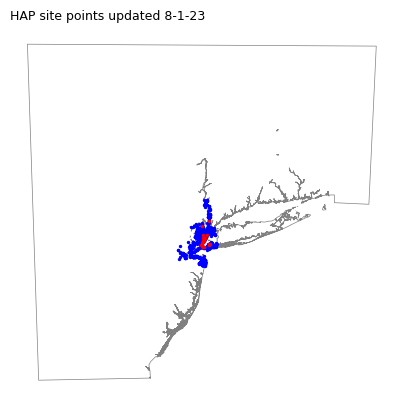

In [221]:
# make sure the data conversion to geodataframe worked 
import matplotlib.pyplot as plt
from fiona.crs import from_epsg

fig,ax = plt.subplots()
surv_points.plot(ax=ax, markersize = 2, zorder = 3, color = 'red') 
ex_data1.plot(ax=ax, markersize = 2, zorder = 2, color = 'blue') 
land.plot(ax=ax, ec = 'grey', fc = 'white', zorder = 1, lw = 0.5)
ax.axis('off')
ax.set_title('HAP site points updated 8-1-23', loc='left', fontsize=9)



In [223]:
# check crs of data
surv_points.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [202]:
# saving as geojson is not working because of a duplicaate column name
# trying to figure out where the duplicate column is
ex_data1.columns.duplicated()
# reindex survey data: this didn't help 
start=752
surv_new2=surv_new.set_index( np.arange(start, start+len(surv_new)))

In [131]:
surv_new2.index

Int64Index([752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764,
            765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777,
            778, 779, 780, 781, 782],
           dtype='int64')

In [225]:
# check to see if there are duplicate column names
ex_data2.columns.duplicated()
# there are no more duplicated columns in the data 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [203]:
# resort the column names alphabetically to find duplicate
print(ex_data1.columns.sort_values().values)
# duplicate is walking trails

['CreationDate' 'Creator' 'EditDate' 'Editor' 'FISH_YN' 'GlobalID'
 'HPBL_YN' 'MPBL_YN' 'ObjectID' 'SWIM_YN' 'access_id' 'access_type'
 'access_type_other' 'accessibility_description' 'act_codes'
 'amenities_description' 'bike_parking_rack'
 'bike_path_access_description' 'bike_path_accessible' 'boat_access'
 'boat_cleaning_requirements_MPBL' 'boat_inspections_MPBL'
 'boat_launch_YN' 'boat_launch_type_HPBL' 'boat_launch_type_MPBL'
 'boat_storage_HPBL' 'boat_storage_MPBL' 'boat_storage_overnight_MPBL'
 'changing_station' 'county' 'difficulty_level_HPBL'
 'difficulty_level_MPBL' 'distance_parking_to_launch_HPBL'
 'distance_parking_to_launch_MPBL' 'drinking_water' 'email_public'
 'email_site_manager' 'equipment_rental' 'fee' 'fee_amount'
 'fish_species_FISH' 'food' 'geometry' 'haul_out_MPBL' 'hours_info'
 'informal_swimming' 'lat' 'lifeguard_SWIM' 'lon' 'municipality'
 'natural_no' 'navigational_notes_MPBL' 'open_close_date' 'owner'
 'owner_type' 'parking' 'parking_description' 'permit_FI

In [227]:
check = ex_data3[['walking_trails']]
print(check)
# these are the same, so either one can be deleted 

    walking_trails
0             None
1                Y
2                Y
3                Y
4                Y
..             ...
746           None
747           None
748           None
749           None
750           None

[751 rows x 1 columns]


In [ ]:
# reorder columns and drop second walking trails column

cols = [
'site_id', 'act_codes','access_id', 'site_name','site_label','site_address', 'site_description',  
'hours_info', 'open_close_date', 'fee', 'fee_amount','public_transit','public_transit_description', 
'url_public','phone_public' ,'email_public','site_manager', 'phone_site_manager','email_site_manager', 
'access_type','access_type_other', 'accessibility_description',  'safety', 'use_limits','water_depth_est', 
'program_YN','program_name', 'program_description', 'program_hours', 'program_id', 'program_phone', 'program_url', 'program_contact',
'amenities_description','restrooms','changing_station','food', 'drinking_water', 'walking_trails','equipment_rental','boat_access','boat_launch_YN','bike_path_accessible','bike_path_access_description', 'bike_parking_rack', 'picnic_area','playground','parking', 'parking_description','pets_allowed','wheelchair_access_amenities', 'wheelchair_access_restrooms','wheelchair_access_trails',
'SWIM_YN','informal_swimming', 'lifeguard_SWIM','safety_SWIM', 'showers_SWIM', 
'FISH_YN', 'fish_species_FISH', 'walking_path_FISH','permit_FISH',
'HPBL_YN', 'difficulty_level_HPBL','distance_parking_to_launch_HPBL','boat_launch_type_HPBL','boat_storage_HPBL', 'trailer_parking_HPBL','safety_HPBL',
'MPBL_YN', 'difficulty_level_MPBL', 'boat_launch_type_MPBL','distance_parking_to_launch_MPBL','boat_cleaning_requirements_MPBL', 'boat_inspections_MPBL', 'boat_storage_MPBL', 'boat_storage_overnight_MPBL','haul_out_MPBL', 'navigational_notes_MPBL','trailer_parking_MPBL', 'pump_out_MPBL','safety_MPBL',
'site_name_photo_01', 'site_name_photo_02','site_name_photo_03','photo_credits','site_score', 'source','sq_acres', 'status','owner', 'owner_type', 'municipality', 'county', 'state',  'waterbody','natural_no','water_quality_monitoring','typology', 'CreationDate', 'Creator', 'EditDate', 'Editor','GlobalID','ObjectID','lat', 'lon', 'x', 'y','geometry']

ex_data2 = ex_data1[cols].copy() # Simplify
ex_data2.tail(12)

In [208]:
ex_data3= ex_data2.loc[:,~ex_data2.columns.duplicated()].copy()

In [228]:
# check to see if there are duplicate column names
ex_data3.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [229]:
ex_data3.head()

,site_id,act_codes,access_id,site_name,site_label,site_address,site_description,hours_info,open_close_date,fee,fee_amount,public_transit,public_transit_description,url_public,phone_public,email_public,site_manager,phone_site_manager,email_site_manager,access_type,access_type_other,accessibility_description,safety,use_limits,water_depth_est,program_YN,program_name,program_description,program_hours,program_id,program_phone,program_url,program_contact,amenities_description,restrooms,changing_station,food,drinking_water,walking_trails,equipment_rental,boat_access,boat_launch_YN,bike_path_accessible,bike_path_access_description,bike_parking_rack,picnic_area,playground,parking,parking_description,pets_allowed,wheelchair_access_amenities,wheelchair_access_restrooms,wheelchair_access_trails,SWIM_YN,informal_swimming,lifeguard_SWIM,safety_SWIM,showers_SWIM,FISH_YN,fish_species_FISH,walking_path_FISH,permit_FISH,HPBL_YN,difficulty_level_HPBL,distance_parking_to_launch_HPBL,boat_launch_type_HPBL,boat_storage_HPBL,trailer_parking_HPBL,safety_HPBL,MPBL_YN,difficulty_level_MPBL,boat_launch_type_MPBL,distance_parking_to_launch_MPBL,boat_cleaning_requirements_MPBL,boat_inspections_MPBL,boat_storage_MPBL,boat_storage_overnight_MPBL,haul_out_MPBL,navigational_notes_MPBL,trailer_parking_MPBL,pump_out_MPBL,safety_MPBL,site_name_photo_01,site_name_photo_02,site_name_photo_03,photo_credits,site_score,source,sq_acres,status,owner,owner_type,municipality,county,state,waterbody,natural_no,water_quality_monitoring,typology,CreationDate,Creator,EditDate,Editor,GlobalID,ObjectID,lat,lon,x,y,geometry
0,174,"FISH, HPBL, MPBL","4, 516, 151, 787",Bayswater Park,None,"Dwight Ave, Seagirt Blvd between Beach 38th St...","This waterfront park is named, in part, for Ju...",Sunrise to Sunset (April 1 to December 1),None,None,None,Y,Subway: A to Beach 36th st; Q22 bus to Beach C...,"www.nycgovparks.org/parks/bayswater-park, www....",None,None,NYC Parks,None,None,None,None,None,"Launch perpendicular, as large, jagged rocks p...",None,None,Y,Kids in Motion,None,None,None,None,None,Kids in Motion,None,Y,None,None,Y,None,None,None,Y,None,None,None,Y,Y,None,None,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,3.0,"nyc water trail,nyc wap fish","40.16,NA",None,NYC Parks,NYC Parks,"Queens,New York City",Queens,"NY,","Jamaica Bay,",None,NaN,"Beach,",None,None,None,None,None,None,40.599294,-73.768664,-73.768664,40.599294,POINT (-73.76866 40.59929)
1,29,"MPBL, HPBL, FISH","126, 83, 1613, 1803",Conference House Park,None,"Hylan Blvd & Satterlee St, Staten Island, Hyla...",The site of a legendary display of American de...,Sunrise to Sunset (April 1 to December 1),None,Y,None,Y,"S59, S78, X17, X22, X22A bus to Hylan Blvd, Cr...",www.dec.ny.gov/outdoor/8377.html,None,None,None,None,None,None,None,None,Many semi-submerged pilings north and south of...,"Rules prohibit swimming, diving, or bathing, r...",None,Y,Kayak Staten Island,None,None,None,None,None,Kayak Staten Island,None,Y,None,None,Y,Y,None,None,Y,None,None,None,None,Y,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1.0,"nyc water trail,nyc wap fish",None,"c,",NYC Parks,None,"Staten Island,,New York City",Richmond,"NY,","Arthur Kill + Kill Van Kull,",None,NaN,"Beach,",None,None,None,None,None,None,40.501400,-74.240515,-74.240515,40.501400,POINT (-74.24052 40.50140)
2,183,FISH,"1, 443, 511, 800",Mt Loretto Natural Area,None,"End of Sharrotts Ave at Hylan Blvd, Hylan Blvd...",None,None,None,None,None,Y,"S59, S78 bus to Hylan Blvd, Sharrott Ave, S59,...",www.dec.ny.gov/outdoor/8377.html,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Y,None,None,None,Y,None,None,Y,None,None,None,None,None,None,None,No

In [210]:
ex_data3.shape # (751, 110)

(751, 110)

## Update existing data with NEW SURVEY DATA 
- this is the method I used to udpate the data: test2.update(surv_new2)
- it replaces old data with updated rows, overwriting the old data
- be sure the data's ready for this and always create a back up before doing the update

In [236]:
#sites_final = pd.concat([ex_data3,surv_new],ignore_index=True)
# try with the surv_points gpd 
sites_final = pd.concat([ex_data3,surv_points],ignore_index=True)

## review the rows added to the main hap sites_final data (ex_data)

In [ ]:
#sites_final2.head(5)
review_new= sites_final[sites_final['Editor'].str.len() > 0]
review_new

In [240]:
review_new.shape

(31, 110)

In [ ]:
review_dupes = sites_final[sites_final.duplicated('site_id', keep=False) == True]
review_dupes

In [242]:
review_dupes.shape

(49, 110)

In [243]:
# save test_final as udpated site_points to check 
# also save a back up with date in editing folder
sites_final.to_file('/Users/saraeichner/Dropbox/hudson_access_project/hap_data/merged_site_data/editing_8-1-23/hap_site_points_fieldupdates_surveyintegration_8-2-23.geojson', driver='GeoJSON')


## Compare As Published hap_site_points to sites_final 
identify field name changes for website udpate

In [244]:
pub = gpd.read_file('/Users/saraeichner/Dropbox/hudson_access_project/hap_data/merged_site_data/current/as_published/hap_site_points.geojson')
pub.head()

,site_id,site_name,access_id,act_codes,access_name,address,county,owner,owner_type,site_manager,phone_site_manager,email_manual,email_site_manager,email_public,phone_public,url_public,program_id,site_description,photo,photo_credits,safety,informal_swimming,use_limits,fee,fee_amount,open_date,close_date,hours_info,hiking,boat_launch_YN,equipment_rental,parking,parking_description,restrooms,drinking_water,changing_station,food,picnic_area,playground,pets_allowed,amenities_description,wheelchair_access_amenities,wheelchair_access_water,wheelchair_access_restrooms,wheelchair_access_trails,accessibility_description,public_transit,bike_path_accessible,bike_path_accessible_description,difficulty_level_HPBL,safety_HPBL,boat_launch_HPBL,boat_storage_HPBL,boat_storage_location_HPBL,shallow_depth_HPBL,deep_depth_HPBL,difficulty_level_MPBL,safety_MPBL,boat_launch_MPBL,boat_storage_MPBL,boat_storage_location_MPBL,boat_storage_overnight_MPBL,navigational_notes_MPBL,pump_out_MPBL,haul_out_MPBL,boat_cleaning_requirements_MPBL,boat_inspections_MPBL,shallow_depth_MPBL,deep_depth_MPBL,access_type_FISH,access_type_other_FISH,permit_FISH,fish_species_FISH,water_type_FISH,walking_path_FISH,limitations_FISH,shallow_depth_FISH,deep_depth_FISH,hazards_SWIM,shoreline_type_SWIM,shoreline_type_other_SWIM,showers_SWIM,lifeguard_SWIM,shallow_depth_SWIM,deep_depth_SWIM,water_quality_monitor_SWIM,trail_name_HIKE,difficulty_level_HIKE,difficulty_accessbility_HIKE,trail_type_HIKE,trail_length_HIKE,est_time_HIKE,marker_color_HIKE,trail_use_allows_HIKE,trail_end_location_HIKE,bike_locks_BIKE,route_type_BIKE,route_type_other_BIKE,pump_area_BIKE,route_length_BIKE,max_elevation_BIKE,municipality,natural_no,site_label,source,sq_acres,state,status,typology,waterbody,program,program_name,program_email,program_phone,program_url,program_hours,program_description,long,lat,public_transit_description,x,geometry
0,1,Riverside Park,"9, 097, 941, 594, 168, 710, 000, 000",HPBL,"West 72nd Street, 79th Street Boat Basin, Rive...","W 79th St End, Manhattan",New York,NYC Parks,None,None,None,"NA,mail@riversideparknyc.org,",None,None,None,"www.nycgovparks.org/facilities/kayak/3, www.ny...",None,"This site is considered a cultural resource, ...",None,None,Dock is sheltered but there are strong current...,None,None,None,None,None,None,Sunrise to Sunset (April 1 to December 1),Y,Y,None,Y,Street Parking,Y,Y,None,Y,None,None,None,None,None,None,None,None,None,Y,None,None,None,None,Floating Launch,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Borough of Manhattan, New York County,New York...",None,None,"watertrails,nyc water trail,nyc wap hpb",None,NY,c,None,Lower Hudson River,None,None,None,None,,None,,-73.974973,40.798144,"Subway: 1, 2, 3",NaN,POINT (-73.97688 40.79671)
1,10,"Flushing Bay Promenade, Flushing Meadows Coron...","18, 358, 416, 051, 667, 100, 000, 000, 000","FISH, MPBL, HPBL","Flushing Bay Promenade, World's Fair Marina, F...","12500 Northern Blvd, Corona, NY 11368; Flushin...",Queens,NYC Parks City,None,Laurie Howard\n,None,"rpryor@guardiansofflushingbay.org,",rownorthjersey@optimum.net,None,718-478-0480,"www.nycgovparks.org/facilities/kayak/14, www.d...",None,"Rules prohibit: swimming, diving, or bathing\r...",None,None,Watch footing on the steep ramp and slippery d...,None,None,None,None,None,None,Mon-Fri 11:00 AM-7:00 PM; Sat-Sun 10:00 AM-7:0...,None,Y,None,Y,Parking,Y,Y,None,Y,Y,None,None,None,None,None,None,None,None,Y,None,None,None,None,Fixed Launch,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Promenade,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Queens,New York City",None,None,https://www.countyoffice.org/worlds-fair-m

In [246]:
#Compare columns in each dataset (survey export from july 28 and the data with links that was created from hap_site_points on 6-23-23)
# find all columns that are in both the  new survey data export and in the existing site point data (ex_data)): 
(print('matching columns between datasets: ', sites_final.columns.intersection(pub.columns).to_list() ))

# find columns present in dataset 1 that are nto present in dataset 2:  
(print('columns in udpated hap_site_points data only: ', sites_final.columns.difference(pub.columns).to_list()))

# find columns present in dataset 2 that are nto present in dataset 1: 
print('columns in as published data only: ', pub.columns.difference(sites_final.columns).to_list())

matching columns between datasets:  ['site_id', 'act_codes', 'access_id', 'site_name', 'site_label', 'site_description', 'hours_info', 'fee', 'fee_amount', 'public_transit', 'public_transit_description', 'url_public', 'phone_public', 'email_public', 'site_manager', 'phone_site_manager', 'email_site_manager', 'accessibility_description', 'safety', 'use_limits', 'program_name', 'program_description', 'program_hours', 'program_id', 'program_phone', 'program_url', 'amenities_description', 'restrooms', 'changing_station', 'food', 'drinking_water', 'equipment_rental', 'boat_launch_YN', 'bike_path_accessible', 'picnic_area', 'playground', 'parking', 'parking_description', 'pets_allowed', 'wheelchair_access_amenities', 'wheelchair_access_restrooms', 'wheelchair_access_trails', 'informal_swimming', 'lifeguard_SWIM', 'showers_SWIM', 'fish_species_FISH', 'walking_path_FISH', 'permit_FISH', 'difficulty_level_HPBL', 'boat_storage_HPBL', 'safety_HPBL', 'difficulty_level_MPBL', 'boat_cleaning_require

In [ ]:
matching columns between datasets:  ['site_id', 'act_codes', 'access_id', 'site_name', 'site_label', 'site_description', 'hours_info', 'fee', 'fee_amount', 'public_transit', 'public_transit_description', 'url_public', 'phone_public', 'email_public', 'site_manager', 'phone_site_manager', 'email_site_manager', 'accessibility_description', 'safety', 'use_limits', 'program_name', 'program_description', 'program_hours', 'program_id', 'program_phone', 'program_url', 'amenities_description', 'restrooms', 'changing_station', 'food', 'drinking_water', 'equipment_rental', 'boat_launch_YN', 'bike_path_accessible', 'picnic_area', 'playground', 'parking', 'parking_description', 'pets_allowed', 'wheelchair_access_amenities', 'wheelchair_access_restrooms', 'wheelchair_access_trails', 'informal_swimming', 'lifeguard_SWIM', 'showers_SWIM', 'fish_species_FISH', 'walking_path_FISH', 'permit_FISH', 'difficulty_level_HPBL', 'boat_storage_HPBL', 'safety_HPBL', 'difficulty_level_MPBL', 'boat_cleaning_requirements_MPBL', 'boat_inspections_MPBL', 'boat_storage_MPBL', 'boat_storage_overnight_MPBL', 'haul_out_MPBL', 'navigational_notes_MPBL', 'pump_out_MPBL', 'safety_MPBL', 'photo_credits', 'source', 'sq_acres', 'status', 'owner', 'owner_type', 'municipality', 'county', 'state', 'waterbody', 'natural_no', 'typology', 'lat', 'x', 'geometry']

columns in sites_final / udpated hap_site_points data only:  ['CreationDate', 'Creator', 'EditDate', 'Editor', 'FISH_YN', 'GlobalID', 'HPBL_YN', 'MPBL_YN', 'ObjectID', 'SWIM_YN', 'access_type', 'access_type_other', 'bike_parking_rack', 'bike_path_access_description', 'boat_access', 'boat_launch_type_HPBL', 'boat_launch_type_MPBL', 'distance_parking_to_launch_HPBL', 'distance_parking_to_launch_MPBL', 'lon', 'open_close_date', 'program_YN', 'program_contact', 'safety_SWIM', 'site_address', 'site_name_photo_01',    'water_depth_est', 'water_quality_monitoring', 'y']

columns in as published data only:  ['access_name', 'access_type_FISH', 'access_type_other_FISH', 'address', 'bike_locks_BIKE', 'bike_path_accessible_description', 'boat_launch_HPBL', 'boat_launch_MPBL', 'boat_storage_location_HPBL', 'boat_storage_location_MPBL', 'close_date', 'deep_depth_FISH', 'deep_depth_HPBL', 'deep_depth_MPBL', 'deep_depth_SWIM', 'difficulty_accessbility_HIKE', 'difficulty_level_HIKE', 'email_manual', 'est_time_HIKE', 'hazards_SWIM', 'hiking', 'limitations_FISH', 'long', 'marker_color_HIKE', 'max_elevation_BIKE', 'open_date', 'photo', 'program', 'program_email', 'pump_area_BIKE', 'route_length_BIKE', 'route_type_BIKE', 'route_type_other_BIKE', 'shallow_depth_FISH', 'shallow_depth_HPBL', 'shallow_depth_MPBL', 'shallow_depth_SWIM', 'shoreline_type_SWIM', 'shoreline_type_other_SWIM', 'trail_end_location_HIKE', 'trail_length_HIKE', 'trail_name_HIKE', 'trail_type_HIKE', 'trail_use_allows_HIKE', 'water_quality_monitor_SWIM', 'water_type_FISH', 'wheelchair_access_water']

Removed from old hap_site_points (as published)
['access_name', 'access_type_FISH', 'access_type_other_FISH', , 'boat_storage_location_HPBL', 'boat_storage_location_MPBL',  'difficulty_accessbility_HIKE', 'difficulty_level_HIKE', 'est_time_HIKE',  'marker_color_HIKE', 'max_elevation_BIKE', 'program_email', 'pump_area_BIKE', 'route_length_BIKE', 'route_type_BIKE', 'route_type_other_BIKE', 'shallow_depth_FISH', 'shallow_depth_HPBL', 'shallow_depth_MPBL', 'shallow_depth_SWIM',  'trail_end_location_HIKE', 'trail_length_HIKE', 'trail_name_HIKE', 'trail_type_HIKE', 'trail_use_allows_HIKE', 'water_quality_monitor_SWIM', 'water_type_FISH', 'wheelchair_access_water']

Changed, where there was data in original fields, it was copied to new fields
[ 'long' > 'lon'
 'address'> 'site_address'
 'bike_locks_BIKE' > 'bike_parking_rack', 
 'bike_path_accessible_description' > 'bike_path_access_description',
 'email_manual' > 'email_public'
 'program_email' > 'program_contact'
 'program' > 'program_YN'
'close_date'  'open_date',  > 'open_close_date'
'X', 'Y' > 'x', 'y'
 'hazards_SWIM' > 'safety_SWIM',
 'hiking' > 'walking_trails'
 'deep_depth_FISH', 'deep_depth_HPBL', 'deep_depth_MPBL', 'deep_depth_SWIM' > 'water_depth_est'
 'limitations_FISH', > 'use_limits'
 'photo' > 'site_name_photo_01'
 'shoreline_type_SWIM', 'shoreline_type_other_SWIM' > 'access_type'
 'boat_launch_HPBL' > 'boat_launch_type_HPBL'
 'boat_launch_MPBL' > 'boat_launch_type_MPBL'
 ]

Added to new sites_final dataset
[ 'FISH_YN', 'HPBL_YN', 'MPBL_YN', 'SWIM_YN',
'site_name_photo_02', 'site_name_photo_03', 'water_quality_monitoring','site_score', 'trailer_parking_HPBL', 'trailer_parking_MPBL','boat_access','distance_parking_to_launch_HPBL', 'distance_parking_to_launch_MPBL','CreationDate', 'ObjectID','Creator', 'EditDate', 'Editor', 'GlobalID','access_type', 'access_type_other', ]

## When creating survey links: 
- the data fields should match 
- EJ index, or site score will not. remove that from the data to use for prepopulating the survey links

## HUDSON RIVER PARK data edits


- for HRP Pier 84, Program Name: Manhattan Kayak Circumnavigation, Manhattan Kayak Company >> change to Manhattan Kayak Company only 
- for all HRP sites, move program emails to program contact
- Look at all duplicates: ex_data_links.duplicated()
- drop duplicates but keep first: DataFrame.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [ ]:
# dropping the duplicate didn't work because the data has unique ids

# to drop the duplicate Pier 84 row I used the following code
#### first: show all rows that have pier 84 in the "site_name" column
# ex_data_links[ex_data_links['site_name'].str.contains("Pier 84")]
### Then: drop row # 738 from ex_data_links and go back and look again
# ex_data_links = ex_data_links.drop([738])

## Hudson River Park Piers corrections
All of these are managed / owned by the Hudson River Park trust (hudsonriverpark.org), but each has different programming operated by different entities. 
- replace the program names, program urls, etc. 

In [64]:
ex_data_links.loc[ex_data_links['site_name'].str.contains('Hudson River Park'), 'email_site_manager'] ="info@hudsonriverpark.org"
ex_data_links.loc[ex_data_links['site_name'].str.contains('Hudson River Park, Pier 26'),'program_name'] = "Downtown Boathouse"
ex_data_links.loc[ex_data_links['site_name'].str.contains('Hudson River Park, Pier 26'), 'program_contact'] ="info@downtownboathouse.org"
ex_data_links.loc[ex_data_links['site_name'].str.contains('Hudson River Park, Pier 26'),'program_url'] = "https://www.downtownboathouse.org/"
ex_data_links.loc[ex_data_links['site_name'].str.contains('Hudson River Park, Pier 84'),'program_name'] ="Manhattan Kayak Company")

ex_data_links.loc[ex_data_links['site_name'].str.contains('Hudson River Park, Pier 96'),'program_name'] = "Manhattan Community Boathouse"
ex_data_links.loc[ex_data_links['site_name'].str.contains('Hudson River Park, Pier 96'),'program_url'] = 'https://www.manhattancommunityboathouse.org/'
ex_data_links.loc[ex_data_links['site_name'].str.contains('Hudson River Park, Pier 66'),'program_name'] = 'Hudson River Community Saililng'
ex_data_links.loc[ex_data_links['site_name'].str.contains('Hudson River Park, Pier 66'),'program_url'] = 'https://hudsonsailing.org/'
ex_data_links.loc[ex_data_links['site_name'].str.contains('Hudson River Park, Pier 66'),'program_contact'] ='info@hudsonsailing.org'
ex_data_links.loc[ex_data_links['site_name'].str.contains('Hudson River Park, Pier 57'),'program_url'] = 'https://hudsonriverpark.org/locations/pier-57/'
ex_data_links.loc[ex_data_links['site_name'].str.contains('Hudson River Park, Pier 84'), 'program_contact'] ="info@manhattankayak.com"

ex_data_links.loc[ex_data_links['site_name'].str.contains('Hudson River Park, Pier 25'), 'program_contact'] ='crew@pier25marina.com'
ex_data_links.loc[ex_data_links['site_name'].str.contains('Hudson River Park, Pier 25'), 'program_name'] ='Pier 25 Marina'
ex_data_links.loc[ex_data_links['site_name'].str.contains('Hudson River Park, Pier 40'), 'program_contact'] =''
ex_data_links.loc[ex_data_links['site_name'].str.contains('Hudson River Park, Pier 84'), 'program_contact'] =''
ex_data_links.loc[ex_data_links['site_name'].str.contains('Hudson River Park, Pier 96'), 'program_contact'] =''


,site_name,email_site_manager,program_contact,program_name,program_url
730,"Hudson River Park, Pier 25",info@hudsonriverpark.org,crew@pier25marina.com,Pier 25 Marina,https://crewny.com/pier-25-marina
731,"Hudson River Park, Pier 26",info@hudsonriverpark.org,info@downtownboathouse.org,Downtown Boathouse,None
732,"Hudson River Park, Pier 40",info@hudsonriverpark.org,,Village Community Boathouse,www.villagecommunityboathouse.org
733,"Hudson River Park, Christopher Street Pier",info@hudsonriverpark.org,None,None,None
734,"Hudson River Park, Pier 53",info@hudsonriverpark.org,None,None,None
735,"Hudson River Park, Chelsesa Piers",info@hudsonriverpark.org,None,None,None
736,"Hudson River Park, Pier 64",info@hudsonriverpark.org,None,None,None
737,"Hudson River Park, Pier 66",info@hudsonriverpark.org,info@hudsonsailing.org,Hudson River Community Saililng,https://hudsonsailing.org/
739,"Hudson River Park, Pier 84",info@hudsonriverpark.org,,Manhattan Kayak Company,https://manhattankayak.com/
740,"Hudson River Park, Pier 57",info@hudsonriverpark.org,None,None,https://hudsonriverpark.org/locations/pier-57/


### check HRP edits

In [65]:
hrp = (ex_data_links[ex_data_links['site_name'].str.contains('Hudson River Park')][['site_name','email_site_manager', 'program_contact', 'program_name','program_url']])
hrp.head(15)

,site_name,email_site_manager,program_contact,program_name,program_url
730,"Hudson River Park, Pier 25",info@hudsonriverpark.org,crew@pier25marina.com,Pier 25 Marina,https://crewny.com/pier-25-marina
731,"Hudson River Park, Pier 26",info@hudsonriverpark.org,info@downtownboathouse.org,Downtown Boathouse,https://www.downtownboathouse.org/
732,"Hudson River Park, Pier 40",info@hudsonriverpark.org,,Village Community Boathouse,www.villagecommunityboathouse.org
733,"Hudson River Park, Christopher Street Pier",info@hudsonriverpark.org,None,None,None
734,"Hudson River Park, Pier 53",info@hudsonriverpark.org,None,None,None
735,"Hudson River Park, Chelsesa Piers",info@hudsonriverpark.org,None,None,None
736,"Hudson River Park, Pier 64",info@hudsonriverpark.org,None,None,None
737,"Hudson River Park, Pier 66",info@hudsonriverpark.org,info@hudsonsailing.org,Hudson River Community Saililng,https://hudsonsailing.org/
739,"Hudson River Park, Pier 84",info@hudsonriverpark.org,,Manhattan Kayak Company,https://manhattankayak.com/
740,"Hudson River Park, Pier 57",info@hudsonriverpark.org,None,None,https://hudsonriverpark.org/locations/pier-57/


### Add Historic Data  OR Load working data to create survey URLS
I'll append our current site point dataset. The columns must match **perfectly**

In [130]:
# create a list of columns for reference
#for col in ex_data.columns:
   # print(col)

print(ex_data.columns.tolist())

['X', 'Y', 'site_id', 'site_name', 'access_id', 'act_codes', 'access_name', 'address', 'county', 'owner', 'owner_type', 'site_manager', 'phone_site_manager', 'email_manual', 'email_site_manager', 'email_public', 'phone_public', 'url_public', 'program_id', 'site_description', 'photo', 'photo_credits', 'safety', 'informal_swimming', 'use_limits', 'fee', 'fee_amount', 'open_close_date', 'hours_info', 'hiking', 'boat_launch_YN', 'equipment_rental', 'parking', 'parking_description', 'restrooms', 'drinking_water', 'changing_station', 'food', 'picnic_area', 'playground', 'pets_allowed', 'amenities_description', 'wheelchair_access_amenities', 'wheelchair_access_water', 'wheelchair_access_restrooms', 'wheelchair_access_trails', 'accessibility_description', 'public_transit', 'bike_path_accessible', 'bike_path_accessible_description', 'difficulty_level_HPBL', 'safety_HPBL', 'boat_launch_HPBL', 'boat_storage_HPBL', 'difficulty_level_MPBL', 'safety_MPBL', 'boat_launch_MPBL', 'boat_storage_MPBL', 'b

In [152]:
ex_data1.head()

,x,y,site_id,site_name,access_id,site_address,county,owner,owner_type,site_manager,phone_site_manager,email_public,email_site_manager,email_public,phone_public,url_public,program_id,site_description,site_name_photo_01,photo_credits,safety,informal_swimming,use_limits,fee,fee_amount,open_close_date,hours_info,hiking,boat_launch_YN,equipment_rental,parking,parking_description,restrooms,drinking_water,changing_station,food,picnic_area,playground,pets_allowed,amenities_description,wheelchair_access_amenities,wheelchair_access_restrooms,wheelchair_access_trails,accessibility_description,public_transit,bike_path_accessible,bike_path_access_description,difficulty_level_HPBL,safety_HPBL,boat_launch_type_HPBL,boat_storage_HPBL,difficulty_level_MPBL,safety_MPBL,boat_launch_type_MPBL,boat_storage_MPBL,boat_storage_overnight_MPBL,navigational_notes_MPBL,pump_out_MPBL,haul_out_MPBL,boat_cleaning_requirements_MPBL,boat_inspections_MPBL,access_type_FISH,access_type_other_FISH,permit_FISH,fish_species_FISH,walking_path_FISH,safety_SWIM,shoreline_type_SWIM,shoreline_type_other_SWIM,showers_SWIM,lifeguard_SWIM,municipality,natural_no,site_label,source,sq_acres,state,status,typology,waterbody,program_YN,program_name,program_contact,program_phone,program_url,program_hours,program_description,lon,lat,public_transit_description,geometry,CreationDate,Creator,EditDate,Editor,FISH_YN,GlobalID,ObjectID,HPBL_YN,MPBL_YN,SWIM_YN,access_type,access_type_other,bike_parking_rack,bike_pumps,boat_access,boat_storage_location_HPBL,boat_storage_location_MPBL,distance_parking_to_launch_HPBL,distance_parking_to_launch_MPBL,site_name_photo_02,site_name_photo_03,trailer_parking_HPBL,trailer_parking_MPBL,walking_trails,water_depth_est
0,-73.768664,40.599294,174,Bayswater Park,"4, 516, 151, 787","Dwight Ave, Seagirt Blvd between Beach 38th St...",Queens,NYC Parks,NYC Parks,NYC Parks,None,None,None,None,None,"www.nycgovparks.org/parks/bayswater-park, www....",None,"This waterfront park is named, in part, for Ju...",NaN,None,"Launch perpendicular, as large, jagged rocks p...",None,None,None,None,None,Sunrise to Sunset (April 1 to December 1),None,Y,None,None,None,Y,Y,None,None,Y,Y,Y,None,None,None,None,None,Y,None,NaN,None,None,NaN,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,"Queens,New York City",None,None,"nyc water trail,nyc wap fish","40.16,NA","NY,",None,"Beach,","Jamaica Bay,",Y,Kids in Motion,None,None,None,None,None,-73.768664,40.599294,Subway: A to Beach 36th st; Q22 bus to Beach C...,POINT (-73.76866 40.59929),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-74.240515,40.501400,29,Conference House Park,"126, 83, 1613, 1803","Hylan Blvd & Satterlee St, Staten Island, Hyla...",Richmond,NYC Parks,None,None,None,None,None,None,None,www.dec.ny.gov/outdoor/8377.html,None,The site of a legendary display of American de...,NaN,None,Many semi-submerged pilings north and south of...,None,"Rules prohibit swimming, diving, or bathing, r...",Y,None,None,Sunrise to Sunset (April 1 to December 1),Y,Y,None,Y,None,Y,Y,None,None,None,Y,None,None,None,None,None,None,Y,None,NaN,None,None,NaN,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,"Staten Island,,New York City",None,None,"nyc water trail,nyc wap fish",None,"NY,","c,","Beach,","Arthur Kill + Kill Van Kull,",Y,Kayak Staten Island,None,None,None,None,None,-74.240515,40.501400,"S59, S78, X17, X22, X22A bus to Hylan Blvd, Cr...",POINT (-74.24052 40.50140),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-74.217842,40.506834,183,Mt Loretto Natural Area,"1, 443, 511, 800","End of Sharrotts Ave at Hylan Blvd, Hylan Blvd...",Richmond,NYSDEC,None,None,None,None,None,None,None,www.dec.ny.gov/outdoor/8377.html,None,None,NaN,None,None,None,None,None,None,None,None,Y,Y,None,None,None,Y,None,None,None,None,None,None,None

### moving data from one field to another 

In [153]:
# drop the second occurance of email_public from ex_data1
# copy email_public from one to the other duplicate field
#ex_data = ex_data1.join(ex_data.set_index('site_id')['email_public'], on='site_id', rsuffix='_1')
ex_data1 = ex_data1.loc[:,~ex_data1.columns.duplicated()]
ex_data1.head()


,x,y,site_id,site_name,access_id,site_address,county,owner,owner_type,site_manager,phone_site_manager,email_public,email_site_manager,phone_public,url_public,program_id,site_description,site_name_photo_01,photo_credits,safety,informal_swimming,use_limits,fee,fee_amount,open_close_date,hours_info,hiking,boat_launch_YN,equipment_rental,parking,parking_description,restrooms,drinking_water,changing_station,food,picnic_area,playground,pets_allowed,amenities_description,wheelchair_access_amenities,wheelchair_access_restrooms,wheelchair_access_trails,accessibility_description,public_transit,bike_path_accessible,bike_path_access_description,difficulty_level_HPBL,safety_HPBL,boat_launch_type_HPBL,boat_storage_HPBL,difficulty_level_MPBL,safety_MPBL,boat_launch_type_MPBL,boat_storage_MPBL,boat_storage_overnight_MPBL,navigational_notes_MPBL,pump_out_MPBL,haul_out_MPBL,boat_cleaning_requirements_MPBL,boat_inspections_MPBL,access_type_FISH,access_type_other_FISH,permit_FISH,fish_species_FISH,walking_path_FISH,safety_SWIM,shoreline_type_SWIM,shoreline_type_other_SWIM,showers_SWIM,lifeguard_SWIM,municipality,natural_no,site_label,source,sq_acres,state,status,typology,waterbody,program_YN,program_name,program_contact,program_phone,program_url,program_hours,program_description,lon,lat,public_transit_description,geometry,CreationDate,Creator,EditDate,Editor,FISH_YN,GlobalID,ObjectID,HPBL_YN,MPBL_YN,SWIM_YN,access_type,access_type_other,bike_parking_rack,bike_pumps,boat_access,boat_storage_location_HPBL,boat_storage_location_MPBL,distance_parking_to_launch_HPBL,distance_parking_to_launch_MPBL,site_name_photo_02,site_name_photo_03,trailer_parking_HPBL,trailer_parking_MPBL,walking_trails,water_depth_est
0,-73.768664,40.599294,174,Bayswater Park,"4, 516, 151, 787","Dwight Ave, Seagirt Blvd between Beach 38th St...",Queens,NYC Parks,NYC Parks,NYC Parks,None,None,None,None,"www.nycgovparks.org/parks/bayswater-park, www....",None,"This waterfront park is named, in part, for Ju...",NaN,None,"Launch perpendicular, as large, jagged rocks p...",None,None,None,None,None,Sunrise to Sunset (April 1 to December 1),None,Y,None,None,None,Y,Y,None,None,Y,Y,Y,None,None,None,None,None,Y,None,NaN,None,None,NaN,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,"Queens,New York City",None,None,"nyc water trail,nyc wap fish","40.16,NA","NY,",None,"Beach,","Jamaica Bay,",Y,Kids in Motion,None,None,None,None,None,-73.768664,40.599294,Subway: A to Beach 36th st; Q22 bus to Beach C...,POINT (-73.76866 40.59929),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-74.240515,40.501400,29,Conference House Park,"126, 83, 1613, 1803","Hylan Blvd & Satterlee St, Staten Island, Hyla...",Richmond,NYC Parks,None,None,None,None,None,None,www.dec.ny.gov/outdoor/8377.html,None,The site of a legendary display of American de...,NaN,None,Many semi-submerged pilings north and south of...,None,"Rules prohibit swimming, diving, or bathing, r...",Y,None,None,Sunrise to Sunset (April 1 to December 1),Y,Y,None,Y,None,Y,Y,None,None,None,Y,None,None,None,None,None,None,Y,None,NaN,None,None,NaN,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,"Staten Island,,New York City",None,None,"nyc water trail,nyc wap fish",None,"NY,","c,","Beach,","Arthur Kill + Kill Van Kull,",Y,Kayak Staten Island,None,None,None,None,None,-74.240515,40.501400,"S59, S78, X17, X22, X22A bus to Hylan Blvd, Cr...",POINT (-74.24052 40.50140),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-74.217842,40.506834,183,Mt Loretto Natural Area,"1, 443, 511, 800","End of Sharrotts Ave at Hylan Blvd, Hylan Blvd...",Richmond,NYSDEC,None,None,None,None,None,None,www.dec.ny.gov/outdoor/8377.html,None,None,NaN,None,None,None,None,None,None,None,None,Y,Y,None,None,None,Y,None,None,None,None,None,None,None,None,None,Y,None,Y,None,NaN

* * * * * 
* * * * * 
* * * * * 
## CREATE SURVEY LINKS
* * * * * * * * * * 
* * * * * 

In [155]:
ex_data_survlink = ex_data1

In [ ]:

ex_data_survlink['survey_link'] = None

for i,r in ex_data_survlink.iterrows():

    url = 'https://survey123.arcgis.com/share/eb32f62d53694d66a759060c6c0fe75e'
    url = url + "?"
    cols = ex_data_survlink.columns

    for c in cols:
        # c = Column Name
        # r[c] or t = Col Value
        if (c != 'geometry') & (c != 'GlobalID'):
            if (not pd.isnull(r[c])) & (not pd.isnull(c)) & (str(r[c]) != 'nan'):
                t = r[c]# If the field is not empty
        # if (r[c] != "") & (r[c] != None) & (c!='geometry') & (c!='GlobalID')& (r[c]!='nan'): # If the field is not empty
            
                if isinstance( t, str):
                # Replace Problematic Chars, & Space might have to add apostroph as well
                    t=t.replace("&","%26") 
                    t=t.replace(" ","%20")
            
        url = "{}field:{}={}&".format( url, c , t )
    
    # ----------- Add Geometry ----------------
    # didn't need to add geometry because it was already in the existing data and survey export
    # use in future if it's not there
    #url = url + "center={},{}".format( r['geometry'].y , r['geometry'].x )

    ex_data_survlink.loc[ ex_data_survlink.index == i , "survey_link" ] = url

display( ex_data_survlink )
#[print(r + '\n') for i,r in surv3['survey_link'].iteritems()]

In [157]:

ex_data_survlink.head()
ex_data_survlink.to_file(
    #r'C:\Users\csucuogl\Dropbox\Hudson River Access\hap_data\survey_data_prep\survey_links.geojson',
    '/Users/saraeichner/Dropbox/hudson_access_project/hap_data/survey_data_prep/survey_links/survey_links_06232023.geojson',
    driver = 'GeoJSON',
    encoding = 'utf-8'
)
ex_data_survlink.to_csv(
    #r'C:\Users\csucuogl\Dropbox\Hudson River Access\hap_data\survey_tests\survey_links.geojson',
    '/Users/saraeichner/Dropbox/hudson_access_project/hap_data/survey_data_prep/survey_links/survey_links_06232023.csv',
    encoding = 'utf-8'
)

In [ ]:
# save ex_data1 in current data folder as hap_site_points.geojson

## join data collection priority index to survey link data
data collection index: /Users/saraeichner/Dropbox/hudson_access_project/hap_data/survey_data_prep/survey_links/survey_links_06062023.geojson

In [158]:
sl = gpd.read_file('/Users/saraeichner/Dropbox/hudson_access_project/hap_data/survey_data_prep/survey_links/survey_links_06232023.geojson')
dci = pd.read_csv("/Users/saraeichner/Dropbox/hudson_access_project/gis/site_data_prioritization_index/hap_site_polys_3857_06062023_scored.csv")

In [159]:
# subset dci to site id and site_score, site_id as string

dci = dci[['site_id','site_score']]
dci['site_id'] = dci['site_id'].astype(str) 
dci.head()



,site_id,site_score
0,2,4
1,3,4
2,6,2
3,114,5
4,10,3


In [160]:

#join dci site_score to survey links
sl = sl.merge(dci, left_on='site_id', right_on='site_id', how='left')

sl.head()

,x,y,site_id,site_name,access_id,site_address,county,owner,owner_type,site_manager,phone_site_manager,email_public,email_site_manager,phone_public,url_public,program_id,site_description,site_name_photo_01,photo_credits,safety,informal_swimming,use_limits,fee,fee_amount,open_close_date,hours_info,hiking,boat_launch_YN,equipment_rental,parking,parking_description,restrooms,drinking_water,changing_station,food,picnic_area,playground,pets_allowed,amenities_description,wheelchair_access_amenities,wheelchair_access_restrooms,wheelchair_access_trails,accessibility_description,public_transit,bike_path_accessible,bike_path_access_description,difficulty_level_HPBL,safety_HPBL,boat_launch_type_HPBL,boat_storage_HPBL,difficulty_level_MPBL,safety_MPBL,boat_launch_type_MPBL,boat_storage_MPBL,boat_storage_overnight_MPBL,navigational_notes_MPBL,pump_out_MPBL,haul_out_MPBL,boat_cleaning_requirements_MPBL,boat_inspections_MPBL,access_type_FISH,access_type_other_FISH,permit_FISH,fish_species_FISH,walking_path_FISH,safety_SWIM,shoreline_type_SWIM,shoreline_type_other_SWIM,showers_SWIM,lifeguard_SWIM,municipality,natural_no,site_label,source,sq_acres,state,status,typology,waterbody,program_YN,program_name,program_contact,program_phone,program_url,program_hours,program_description,lon,lat,public_transit_description,CreationDate,Creator,EditDate,Editor,FISH_YN,GlobalID,ObjectID,HPBL_YN,MPBL_YN,SWIM_YN,access_type,access_type_other,bike_parking_rack,bike_pumps,boat_access,boat_storage_location_HPBL,boat_storage_location_MPBL,distance_parking_to_launch_HPBL,distance_parking_to_launch_MPBL,site_name_photo_02,site_name_photo_03,trailer_parking_HPBL,trailer_parking_MPBL,walking_trails,water_depth_est,survey_link,geometry,site_score
0,-73.768664,40.599294,174,Bayswater Park,"4, 516, 151, 787","Dwight Ave, Seagirt Blvd between Beach 38th St...",Queens,NYC Parks,NYC Parks,NYC Parks,None,None,None,None,"www.nycgovparks.org/parks/bayswater-park, www....",None,"This waterfront park is named, in part, for Ju...",None,None,"Launch perpendicular, as large, jagged rocks p...",None,None,None,None,None,Sunrise to Sunset (April 1 to December 1),None,Y,None,None,None,Y,Y,None,None,Y,Y,Y,None,None,None,None,None,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Queens,New York City",None,None,"nyc water trail,nyc wap fish","40.16,NA","NY,",None,"Beach,","Jamaica Bay,",Y,Kids in Motion,None,None,None,None,None,-73.768664,40.599294,Subway: A to Beach 36th st; Q22 bus to Beach C...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,https://survey123.arcgis.com/share/eb32f62d536...,POINT (-73.76866 40.59929),3.0
1,-74.240515,40.501400,29,Conference House Park,"126, 83, 1613, 1803","Hylan Blvd & Satterlee St, Staten Island, Hyla...",Richmond,NYC Parks,None,None,None,None,None,None,www.dec.ny.gov/outdoor/8377.html,None,The site of a legendary display of American de...,None,None,Many semi-submerged pilings north and south of...,None,"Rules prohibit swimming, diving, or bathing, r...",Y,None,None,Sunrise to Sunset (April 1 to December 1),Y,Y,None,Y,None,Y,Y,None,None,None,Y,None,None,None,None,None,None,Y,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Staten Island,,New York City",None,None,"nyc water trail,nyc wap fish",None,"NY,","c,","Beach,","Arthur Kill + Kill Van Kull,",Y,Kayak Staten Island,None,None,None,None,None,-74.240515,40.501400,"S59, S78, X17, X22, X22A bus to Hylan Blvd, Cr...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,https://survey123.arcgis.com/share/eb32f62d536...,POINT (-74.24052 40.50140),1.0
2,-74.217842,40.506834,183,Mt Loretto Natural Area,"1, 443, 511, 800","End of Sharrotts Ave at Hylan Blvd, Hylan Blvd...",Richmond,NYSDEC,None,None

In [161]:
# save survey links with dci scores
sl.to_file('/Users/saraeichner/Dropbox/hudson_access_project/hap_data/survey_data_prep/survey_links/site_points_survey_links_scores_06232023.geojson')
# save survey links with dci scores
sl.to_csv('/Users/saraeichner/Dropbox/hudson_access_project/hap_data/survey_data_prep/survey_links/site_points_survey_links_scores_06232023.csv')

* * * * * * * * 
* * * * * * * * 
* * * * * * * * 
* * * * * * * * 
* * * * * * * * 
* * * * * * * * 
* * * * * * * * 


This is from summer 2022
###  Separate Repeat Answers from Survey Responses 
 ### april 2023: 
 I didn't do all of this: instead kept global id, object id, etc. 
 Should they be removed for the prepopulated survey links? doesn't seem to matter 

### fall 2022:  
If an entery has a **parentglobalid**, it has to be a repeat to realte to the master file.  
I removed the repeat question but the data still has some. Let's keep the filter function in.

print(surv_)

### used in fall 2022 when we distributed to county offices
not sending prepopulated links to county offices in spring, 2023

### change column names

These are not present in New Survey
['act_codes', 'access_name', 'address', 'email_manual', 'photo', 'wheelchair_access_water', 'bike_path_accessible_description', 'boat_launch_HPBL', 'boat_launch_MPBL', 'water_type_FISH', 'limitations_FISH', 'shallow_depth_FISH', 'hazards_SWIM', 'shallow_depth_SWIM', 'trail_name_HIKE', 'difficulty_level_HIKE', 'difficulty_accessbility_HIKE', 'trail_type_HIKE', 'trail_length_HIKE', 'est_time_HIKE', 'marker_color_HIKE', 'trail_use_allows_HIKE', 'trail_end_location_HIKE', 'bike_locks_BIKE', 'route_type_BIKE', 'route_type_other_BIKE', 'pump_area_BIKE', 'route_length_BIKE', 'max_elevation_BIKE', 'program', 'program_email', 'long']


#### Format Date Time Columns in the new data

* * * *


## Problem spot
Haven't been able to convert date time format correctly below which causes an error in the survey

In [ ]:
ex_data.head()

In [72]:
ex_data1 = ex_data

In [ ]:
#removed "all year" from opening dates because it was causing problems converting to date format
# still not working though
# ex_data1['open_date'].str.replace('All Year,', '')

In [17]:
ex_data1.loc[ ex_data1['open_date']=='all year,' ,'open_date'] = '01-01-2023'
ex_data1.loc[ ex_data1['open_date']=='All Year' ,'open_date'] = '01-01-2023'
ex_data1.loc[ ex_data1['open_date']=='All Year,' , 'open_date'] = '01-01-2023'
ex_data1.loc[ ex_data1['open_date']=='1-May,' ,'open_date'] = '05-01-2023'
ex_data1.loc[ ex_data1['close_date']=='all Year' , 'close_date'] = '12-31-2023'
ex_data1.loc[ ex_data1['close_date']=='31-Oct,' ,'close_date'] = '10-31-2023'



In [ ]:
ex_data1['open_date'].fillna('')
ex_data1['close_date'].fillna('')

In [ ]:
#df['Date'] = pd.to_datetime(df['Date'], errors='ignore')
# Format Date time
#ex_data1['open_date'].fillna('all year')

ex_data1['open_date'] = pd.to_datetime( ex_data1['open_date'])
ex_data1['close_date'] = pd.to_datetime( ex_data1['close_date'])
#surv1['close_date'] = pd.to_datetime( surv1['close_date'], errors='coerce')

ex_data1['open_date'] = ex_data1['open_date'].dt.strftime("%m/%d/%y")
ex_data1['close_date'] = ex_data1['close_date'].dt.strftime("%m/%d/%y")

In [ ]:
ex_data1.head()

In [24]:
ex_data2 = ex_data1.copy()
#ex_data2.style.format({'open_date': lambda t: t.strftime("%d-%m-%Y")}) 
#ex_data2.style.format({'close_date': lambda t: t.strftime("%d-%m-%Y")}) 
ex_data2[["site_name",'open_date','close_date']]

,site_name,open_date,close_date
0,Riverside Park,None,None
1,"Flushing Bay Promenade, Flushing Meadows Coron...",None,None
2,Alice Austen House & Park,None,None
3,Coney Island Creek Park,None,None
4,New York Skyport Marina,None,None
...,...,...,...
746,Breezy Point Tip at Jamaica Bay,None,None
747,River Barge Park,None,None
748,Gowanus Canal Sponge Park,None,None
749,Lowe's Gowanus Parklet & Boat Launch,None,None


In [ ]:
# Format Date time
#surv1['When does the site open for the season?'] = pd.to_datetime( surv1['When does the site open for the season?'] )
ex_data2['close_date'] = pd.to_datetime( ex_data2['close_date'] )
ex_data2['open_date'] = pd.to_datetime( ex_data2['open_date'] )
#ex_data2 = ex_data1

#ex_data2['open_date'] = ex_data2['open_date'].dt.strftime("%m/%d/%Y")
#ex_data2['close_date'] = ex_data2['close_date'].dt.strftime("%m/%d/%Y")

ex_data3 = ex_data2.copy()

ex_data3[["site_name",'open_date','close_date']]

**Merge Data Sets**

In [ ]:
ex_data3.head()

In [26]:
# Merge Historic and Current Data

# change dataframe name to match code below, - SE
surv3 = pd.concat( [surv,ex_data2] )


/Applications/anaconda3/envs/geospatial2023/lib/python3.11/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


### Create Custom Survey Links.  to send prepopulated surveys

Here is how it works:

**Survey URL** + ?field: **field_name**=**survey_responce**  

An Example

https://survey123.arcgis.com/share/97a675a604ee4fefac1a9c20ecceed9c?field:site_name=Can's%20Home  
This would prepopulate the surveys site_name question as Can's Home.


In [ ]:
# add columns to existing data so dataset matches survey columns
# dc1=dc
# df1 = pd.DataFrame(columns=['HPBL_YN', 'MPBL_YN', 'geometry'])

ex_data2.head()

In [29]:
#backup=ex_data2
#ex_data_survlink = ex_data3
ex_data_survlink = ex_data2

In [ ]:
ex_data_survlink.tail()

In [ ]:

ex_data_survlink['survey_link'] = None

for i,r in ex_data_survlink.iterrows():

   # old survey link: url = 'https://survey123.arcgis.com/share/f8b5568a958a4b6dad8cd66c8d697060'
    url = 'https://survey123.arcgis.com/share/eb32f62d53694d66a759060c6c0fe75e'
    url = url + "?"
    cols = ex_data_survlink.columns

    for c in cols:
        # c = Column Name
        # r[c] or t = Col Value
        if (r[c] != "") & (r[c] != None) & (c!='geometry') & (c!='globalid')& (r[c]!='nan'): # If the field is not empty
            t = r[c]
            if isinstance( t, str):
                # Replace Problematic Chars, & Space might have to add apostroph as well
                t=t.replace("&","%26") 
                t=t.replace(" ","%20")
            
            url = "{}field:{}={}&".format( url, c , t )
    
    # ----------- Add Geometry ----------------
    # didn't need to add geometry because it was already in the existing data and survey export
    # use in future if it's not there
    #url = url + "center={},{}".format( r['geometry'].y , r['geometry'].x )

    ex_data_survlink.loc[ ex_data_survlink.index == i , "survey_link" ] = url

display( ex_data_survlink )
#[print(r + '\n') for i,r in surv3['survey_link'].iteritems()]

In [ ]:
ex_data_survlink.head()

In [33]:
ex_data_survlink = ex_data2
ex_data_survlink.head()
ex_data_survlink.to_file(
    #r'C:\Users\csucuogl\Dropbox\Hudson River Access\hap_data\survey_data_prep\survey_links.geojson',
    '/Users/saraeichner/Dropbox/hudson_access_project/hap_data/survey_data_prep/survey_links/survey_links_06222023.geojson',
    driver = 'GeoJSON',
    encoding = 'utf-8'
)
ex_data_survlink.to_csv(
    #r'C:\Users\csucuogl\Dropbox\Hudson River Access\hap_data\survey_tests\survey_links.geojson',
    '/Users/saraeichner/Dropbox/hudson_access_project/hap_data/survey_data_prep/survey_links/survey_links_06222023.csv',
    encoding = 'utf-8'
)

## join data collection priority index to survey link data
data collection index: /Users/saraeichner/Dropbox/hudson_access_project/hap_data/survey_data_prep/survey_links/survey_links_06062023.geojson

In [34]:
sl = gpd.read_file('/Users/saraeichner/Dropbox/hudson_access_project/hap_data/survey_data_prep/survey_links/survey_links_06222023.geojson')

In [36]:

dci = pd.read_csv("/Users/saraeichner/Dropbox/hudson_access_project/gis/site_data_prioritization_index/hap_site_polys_3857_06062023_scored.csv")

In [5]:
dci.head()

,site_name,act_codes,address,site_id,access_id,epa,aapa,epawf,uwfp,dac,ej,lines,transit,site_score
0,Ferry Point Park,FISH,Hutchinson River Parkway by the Whitestone Bri...,2,NaN,1,1,0,0,1,1,NaN,0,4
1,Calvert Vaux Park,"MPBL,FISH","Shore Rd-Bay 46th St. Bensonhurst,",3,NaN,1,1,0,0,1,1,NaN,0,4
2,Great Kills Park,"MPBL,HPBL,FISH","192 Buffalo St, Staten Island,Hylan Blvd & Bu...",6,NaN,0,0,0,0,0,1,SIR,1,2
3,East River Esplanade And Bikeway (E 90th St - ...,"FISH,HPBL","E 96th St, Manhattan,FDR Dr. near 107th St",114,NaN,1,1,0,0,1,1,Q,1,5
4,Flushing Bay Promenade,"FISH,MPBL,HPBL",Flushing Bay Promenade bet. Worlds Fair Marina...,10,NaN,1,0,0,0,0,1,7,1,3


In [37]:
# subset dci to site id and site_score, site_id as string

dci = dci[['site_id','site_score']]
dci['site_id'] = dci['site_id'].astype(str) 
dci.head()


,site_id,site_score
0,2,4
1,3,4
2,6,2
3,114,5
4,10,3


In [ ]:
#join dci site_score to survey links
sl = sl.merge(dci, left_on='site_id', right_on='site_id', how='left')

sl.head()


In [39]:
# save survey links with dci scores
sl.to_file('/Users/saraeichner/Dropbox/hudson_access_project/hap_data/survey_data_prep/survey_links/site_points_survey_links_scores_06222023.geojson')
# save survey links with dci scores
sl.to_csv('/Users/saraeichner/Dropbox/hudson_access_project/hap_data/survey_data_prep/survey_links/site_points_survey_links_scores_06222023.csv')

#### Subset county data by county name to send as tables to each county contact

In [125]:
display(ex_data_survlink)

,site_id,site_name,access_id,site_address,county,owner,owner_type,site_manager,phone_site_manager,email_site_manager,email_public,phone_public,url_public,program_id,site_description,photo_credits,safety,informal_swimming,use_limits,fee,fee_amount,open_date,close_date,hours_info,hiking,boat_launch_YN,equipment_rental,parking,parking_description,restrooms,drinking_water,changing_station,food,picnic_area,playground,pets_allowed,amenities_description,wheelchair_access_amenities,wheelchair_access_restrooms,wheelchair_access_trails,accessibility_description,public_transit,public_transit_description,bike_path_accessible,bike_path_access_description,difficulty_level_HPBL,safety_HPBL,boat_launch_type_HPBL,boat_storage_HPBL,boat_storage_location_HPBL,shallow_depth_HPBL,deep_depth_HPBL,difficulty_level_MPBL,safety_MPBL,boat_launch_type_MPBL,boat_storage_MPBL,boat_storage_location_MPBL,boat_storage_overnight_MPBL,navigational_notes_MPBL,pump_out_MPBL,haul_out_MPBL,boat_cleaning_requirements_MPBL,boat_inspections_MPBL,shallow_depth_MPBL,deep_depth_MPBL,access_type_FISH,access_type_other_FISH,permit_FISH,fish_species_FISH,walking_path_FISH,deep_depth_FISH,safety_SWIM,shoreline_type_SWIM,shoreline_type_other_SWIM,showers_SWIM,lifeguard_SWIM,deep_depth_SWIM,water_quality_monitor_SWIM,bike_parking_rack,bike_pumps,municipality,natural_no,site_label,source,sq_acres,state,status,typology,waterbody,program_name,program_contact,program_phone,program_url,program_hours,program_description,lon,lat,CreationDate,Creator,EditDate,Editor,FISH_YN,GlobalID,ObjectID,SWIM_YN,boat_access,distance_parking_to_launch_HPBL,distance_parking_to_launch_MPBL,trailer_parking_HPBL,trailer_parking_MPBL,x,y,HPBL_YN,MPBL_YN,geometry,survey_link
0,1,Riverside Park,"909,794,1594,1687,1688,1595","W 79th Street End, Manhattan,79th Street Boat...",New York,NYC Parks,None,None,None,mail@riversideparknyc.org,None,None,https://www.nycgovparks.org/facilities/kayak/3...,None,This site is considered a cultural resource\n\...,None,Dock is sheltered but there are strong current...,None,"Rules Prohibit:\nSwimming, diving, or bathing\...",None,None,NaT,NaT,Sunrise to Sunset (April 1 to December 1),Y,Y,None,Y,Street Parking,Y,Y,None,Y,None,None,None,None,None,None,None,None,Y,1,None,None,None,None,Floating Launch,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Borough of Manhattan, New York County,New York...",None,None,"watertrails,nyc water trail,nyc wap hpb",None,NY,c,None,Lower Hudson River,None,None,None,None,None,This site is considered a cultural resource,-73.988100,40.781700,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (-73.98810 40.78170),https://survey123.arcgis.com/share/eb32f62d536...
1,10,Flushing Bay Promenade,"183,584,1605,1766,1767,1768",Flushing Bay Promenade bet. Worlds Fair Marina...,Queens,"NYC Parks,City",None,Laurie Howard\n,None,rownorthjersey@optimum.net,None,718-478-0480,https://www.dec.ny.gov/outdoor/8377.html,None,None,None,Watch footing on the steep ramp and slippery d...,None,"Rules Prohibit:\nSwimming, diving, or bathing\...",None,None,NaT,NaT,Mon-Fri 11:00 AM-7:00 PM; Sat-Sun 10:00 AM-7:0...,None,Y,None,Y,Parking,Y,Y,None,Y,Y,None,None,None,None,None,None,None,Y,Q19/Q48 Bus to 108th St./Astoria Blvd. walk ov...,None,None,None,None,Fixed Launch,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Promenade,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Queens,None,None,https://www.countyoffice.org/worlds-fair-mari-...,None,NY,None,Promenade,Bronx River + Western Long Island Sound,North Jersey Rowing,None,None,None,None,None,-73.858308,40.761475,None,None,None,None,None,None,None,None,None,None,None,None,x,None,None,None,None,POINT (-73.85831 40.76147),https://survey123.arcgis.com/share/eb32f62d536...
2,103,Alice Austen House And Park,"1,216,221,662"

In [181]:
[i for i in ex_data_survlink.sample(3)['survey_link'].tolist()]

## THis is where the error is visible: page 3 of survey in the date / time format "WHen does the site open for the season?"

['https://survey123.arcgis.com/share/eb32f62d53694d66a759060c6c0fe75e?field:site_id=645610&field:site_name=Yonkers%20Corinthian%20Yacht%20Club&field:access_id=790&field:site_address=771%20Warburton%20Ave,%20Yonkers,%20NY%2010701&field:county=Westchester&field:owner_type=Private&field:site_manager=771%20Warburton%20Avenue\nYonkers,%20NY%2010701&field:phone_public=(914)%20376-3183&field:open_date=nan&field:close_date=nan&field:municipality=Yonkers&field:state=NY&field:lon=-73.8924016&field:lat=40.9627082&center=40.9627082,-73.8924016',
 'https://survey123.arcgis.com/share/eb32f62d53694d66a759060c6c0fe75e?field:site_id=57&field:site_name=Battery%20Park&field:access_id=38,39,471,1733,1734&field:site_address=South%20Ferry,Hudson%20River%20bet.%20Liberty%20St.%20and%20Pier%20A,Chambers%20St.%20@%20Hudson%20River,&field:county=New%20York&field:owner=BPCA&field:email_site_manager=info.bpc@bpca.ny.gov&field:url_public=https://www.dec.ny.gov/outdoor/8377.html&field:open_date=nan&field:close_date

## make mailing list with prepopulated URL links
subset / Add to this code when we have contact list
use contact email + survey link, export as list

In [186]:
ex_data_survlink.tail(5)

,site_id,site_name,access_id,site_address,county,owner,owner_type,site_manager,phone_site_manager,email_site_manager,email_public,phone_public,url_public,program_id,site_description,photo_credits,safety,informal_swimming,use_limits,fee,fee_amount,open_date,close_date,hours_info,hiking,boat_launch_YN,equipment_rental,parking,parking_description,restrooms,drinking_water,changing_station,food,picnic_area,playground,pets_allowed,amenities_description,wheelchair_access_amenities,wheelchair_access_restrooms,wheelchair_access_trails,accessibility_description,public_transit,public_transit_description,bike_path_accessible,bike_path_access_description,difficulty_level_HPBL,safety_HPBL,boat_launch_type_HPBL,boat_storage_HPBL,boat_storage_location_HPBL,shallow_depth_HPBL,deep_depth_HPBL,difficulty_level_MPBL,safety_MPBL,boat_launch_type_MPBL,boat_storage_MPBL,boat_storage_location_MPBL,boat_storage_overnight_MPBL,navigational_notes_MPBL,pump_out_MPBL,haul_out_MPBL,boat_cleaning_requirements_MPBL,boat_inspections_MPBL,shallow_depth_MPBL,deep_depth_MPBL,access_type_FISH,access_type_other_FISH,permit_FISH,fish_species_FISH,walking_path_FISH,deep_depth_FISH,safety_SWIM,shoreline_type_SWIM,shoreline_type_other_SWIM,showers_SWIM,lifeguard_SWIM,deep_depth_SWIM,water_quality_monitor_SWIM,bike_parking_rack,bike_pumps,municipality,natural_no,site_label,source,sq_acres,state,status,typology,waterbody,program_name,program_contact,program_phone,program_url,program_hours,program_description,lon,lat,CreationDate,Creator,EditDate,Editor,FISH_YN,GlobalID,ObjectID,SWIM_YN,boat_access,distance_parking_to_launch_HPBL,distance_parking_to_launch_MPBL,trailer_parking_HPBL,trailer_parking_MPBL,x,y,HPBL_YN,MPBL_YN,geometry,survey_link
756,94,Wnyc Transmitter Park,"5,811,713","West St. between Kent St. and Greenpoint Ave,",Kings,NYC Parks,None,None,None,None,None,None,https://www.dec.ny.gov/outdoor/8377.html,None,None,None,None,None,None,None,None,NaN,NaN,None,None,None,None,None,None,None,None,None,None,Y,Y,None,None,None,None,None,None,Y,"G Subway/B32 Bus,",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Brooklyn,New York City",None,None,nyc wap fish,None,None,None,"Pier,",None,None,None,None,None,None,None,-73.960961,40.729819,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (-73.96096 40.72982),https://survey123.arcgis.com/share/eb32f62d536...
757,95,Spring Creek Park,267,"Walkway on bridge, Cross Bay Boulevard",Queens,None,None,None,None,info@parks.nyc.gov,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Y,Q21/Q41 bus to 164 Av/92st,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Beach,None,None,None,None,None,None,None,-73.837008,40.645515,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (-73.83701 40.64551),https://survey123.arcgis.com/share/eb32f62d536...
758,95825,Marine Basin Marina,325,"1900 Shore Parkway, Gravesend, NY 11214",Kings,None,None,None,None,None,None,718-372-5700,None,None,None,None,None,None,None,None,None,NaN,NaN,Mon-Fri 8:30 AM-6:00 PM; Sat-Sun 10:00 AM-4:00 PM,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,https://www.countyoffice.org/marine-basin-mari...,None,None,None,None,None,None,None,None,None,None,None,-73.996102,40.589101,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No

In [188]:

ml= ex_data_survlink[['site_name','county','site_manager','email_site_manager','survey_link']]


In [190]:
ml.head()

,site_name,county,site_manager,email_site_manager,survey_link
0,Riverside Park,New York,None,mail@riversideparknyc.org,https://survey123.arcgis.com/share/eb32f62d536...
1,Flushing Bay Promenade,Queens,Laurie Howard\n,rownorthjersey@optimum.net,https://survey123.arcgis.com/share/eb32f62d536...
2,Alice Austen House And Park,Richmond,None,None,https://survey123.arcgis.com/share/eb32f62d536...
3,Coney Island Creek Park,Kings,None,None,https://survey123.arcgis.com/share/eb32f62d536...
4,New York Skyport Marina,New York,None,None,https://survey123.arcgis.com/share/eb32f62d536...


In [191]:
ml.to_csv(
    #r'C:\Users\csucuogl\Dropbox\Hudson River Access\hap_data\survey_tests\survey_links.geojson',
    '/Users/saraeichner/Dropbox/hudson_access_project/hap_data/survey_data_prep/survey_links/mailing_list_survey_links_04302023_2.csv',
    encoding = 'utf-8'
)

In [ ]:
#sample code: Add site descriptions to ex_data 
# print the site_description for Alice Austen House & Park

ex_data.loc[ex_data['site_name'] == 'Alice Austen House & Park', 'site_description'] = "For most of her life, Alice Austen (1866-1952), a groundbreaking lesbian photographer, lived in the house now preserved on the grounds of this small Staten Island park. The old mansion, parts of which date back to the late 17th century, preserves a sense of old New York. The photographs displayed inside the house document a vast range of experiences in Victorian New York. Alice produced over 7,000 photographs of a rapidly changing New York City, making significant contributions to photographic history, documenting New York immigrant populations, Victorian wome social activities, and the natural and architectural world of her travels.The picturesque grounds look over Buono Beach, a peaceful strip of land bordering the New York Bay. Together, the mansion and waterfront make a lovely detour from the busy 21st century. There is a kayak and canoe launch" 
print(ex_data.loc[ex_data['site_name'] == 'Alice Austen House & Park', 'site_description'].iloc[0])

#ex_data1.loc[ ex_data1['open_date']=='all year,' ,'open_date'] = '01-01-2023'sample